In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import EstAlpha
import EvalFunctions as ev
import PrePro

## Full Dataset Visualisation

In [2]:
dataset = PrePro.read_clean_dataset()
dataset.rename(columns={'Net Cash Flow from Financing Activities': 'CF Financing',
                        'Net Cash Flow from Investing Activities': 'CF Investing',
                        'Net Cash Flow from Operating Activities': 'CF Operating'}, inplace=True)
df = dataset.copy()

In [3]:
numerical_features =  ['acoq', 'aoq', 'apq', 'atq', 'ceqq', 'cheq', 'dlttq', 'doq', 'dvpq',
                       'ibadjq', 'ibcomq', 'ibq', 'icaptq', 'lcoq', 'loq', 'ltq', 'niq',
                       'nopiq', 'piq', 'ppentq', 'pstkq', 'pstkrq', 'saleq', 'seqq', 'teqq',
                       'txtq', 'xidoq', 'CF Financing', 'CF Investing', 'CF Operating',
                       'SPPOPGROWUSA', 'INDPRO', 'USAPFCEQDSMEI', 'UNRATE', 'IMPGS', 'CCI',
                       'NAEXKP01USQ657S', 'PPIACO', 'FGEXPND', 'BCI', 'REAINTRATREARAT10Y',
                       'CORESTICKM159SFRBATL', 'EXPGS', 'PNGASEUUSDM', 'APU000072610',
                       'WTISPLC', 'WPU13', 'WPU10', 'WPU02', 'WPU04', 'WPU11', 'PCU33443344',
                       'WPU09', 'WPU01', 'WPU12', 'WPU14', 'WPU15', 'WPU08', 'WPU03', 'WPU07',
                       'WPU06', 'ESG Score', 'Number of Employees', 'Free Float (Percent)']

In [4]:
df['Over 100bn'] = df['Company Market Cap'].apply(lambda x: 'yes' if x > 100000000000 else 'no')
df['Over 100bn'] = df['Over 100bn'].astype('category')
sum(df['Over 100bn'] == 'yes')

7751

In [5]:
df['Over 500bn'] = df['Company Market Cap'].apply(lambda x: 'yes' if x > 500000000000 else 'no')
df['Over 500bn'] = df['Over 500bn'].astype('category')
sum(df['Over 500bn'] == 'yes')

486

In [6]:
df['Over 1tr'] = df['Company Market Cap'].apply(lambda x: 'yes' if x > 1000000000000 else 'no')
df['Over 1tr'] = df['Over 1tr'].astype('category')
sum(df['Over 1tr'] == 'yes')

164

In [7]:
df['Set'] = ['Train' if year < 2019 else 'Test' for year in df.index.get_level_values('Date').year]

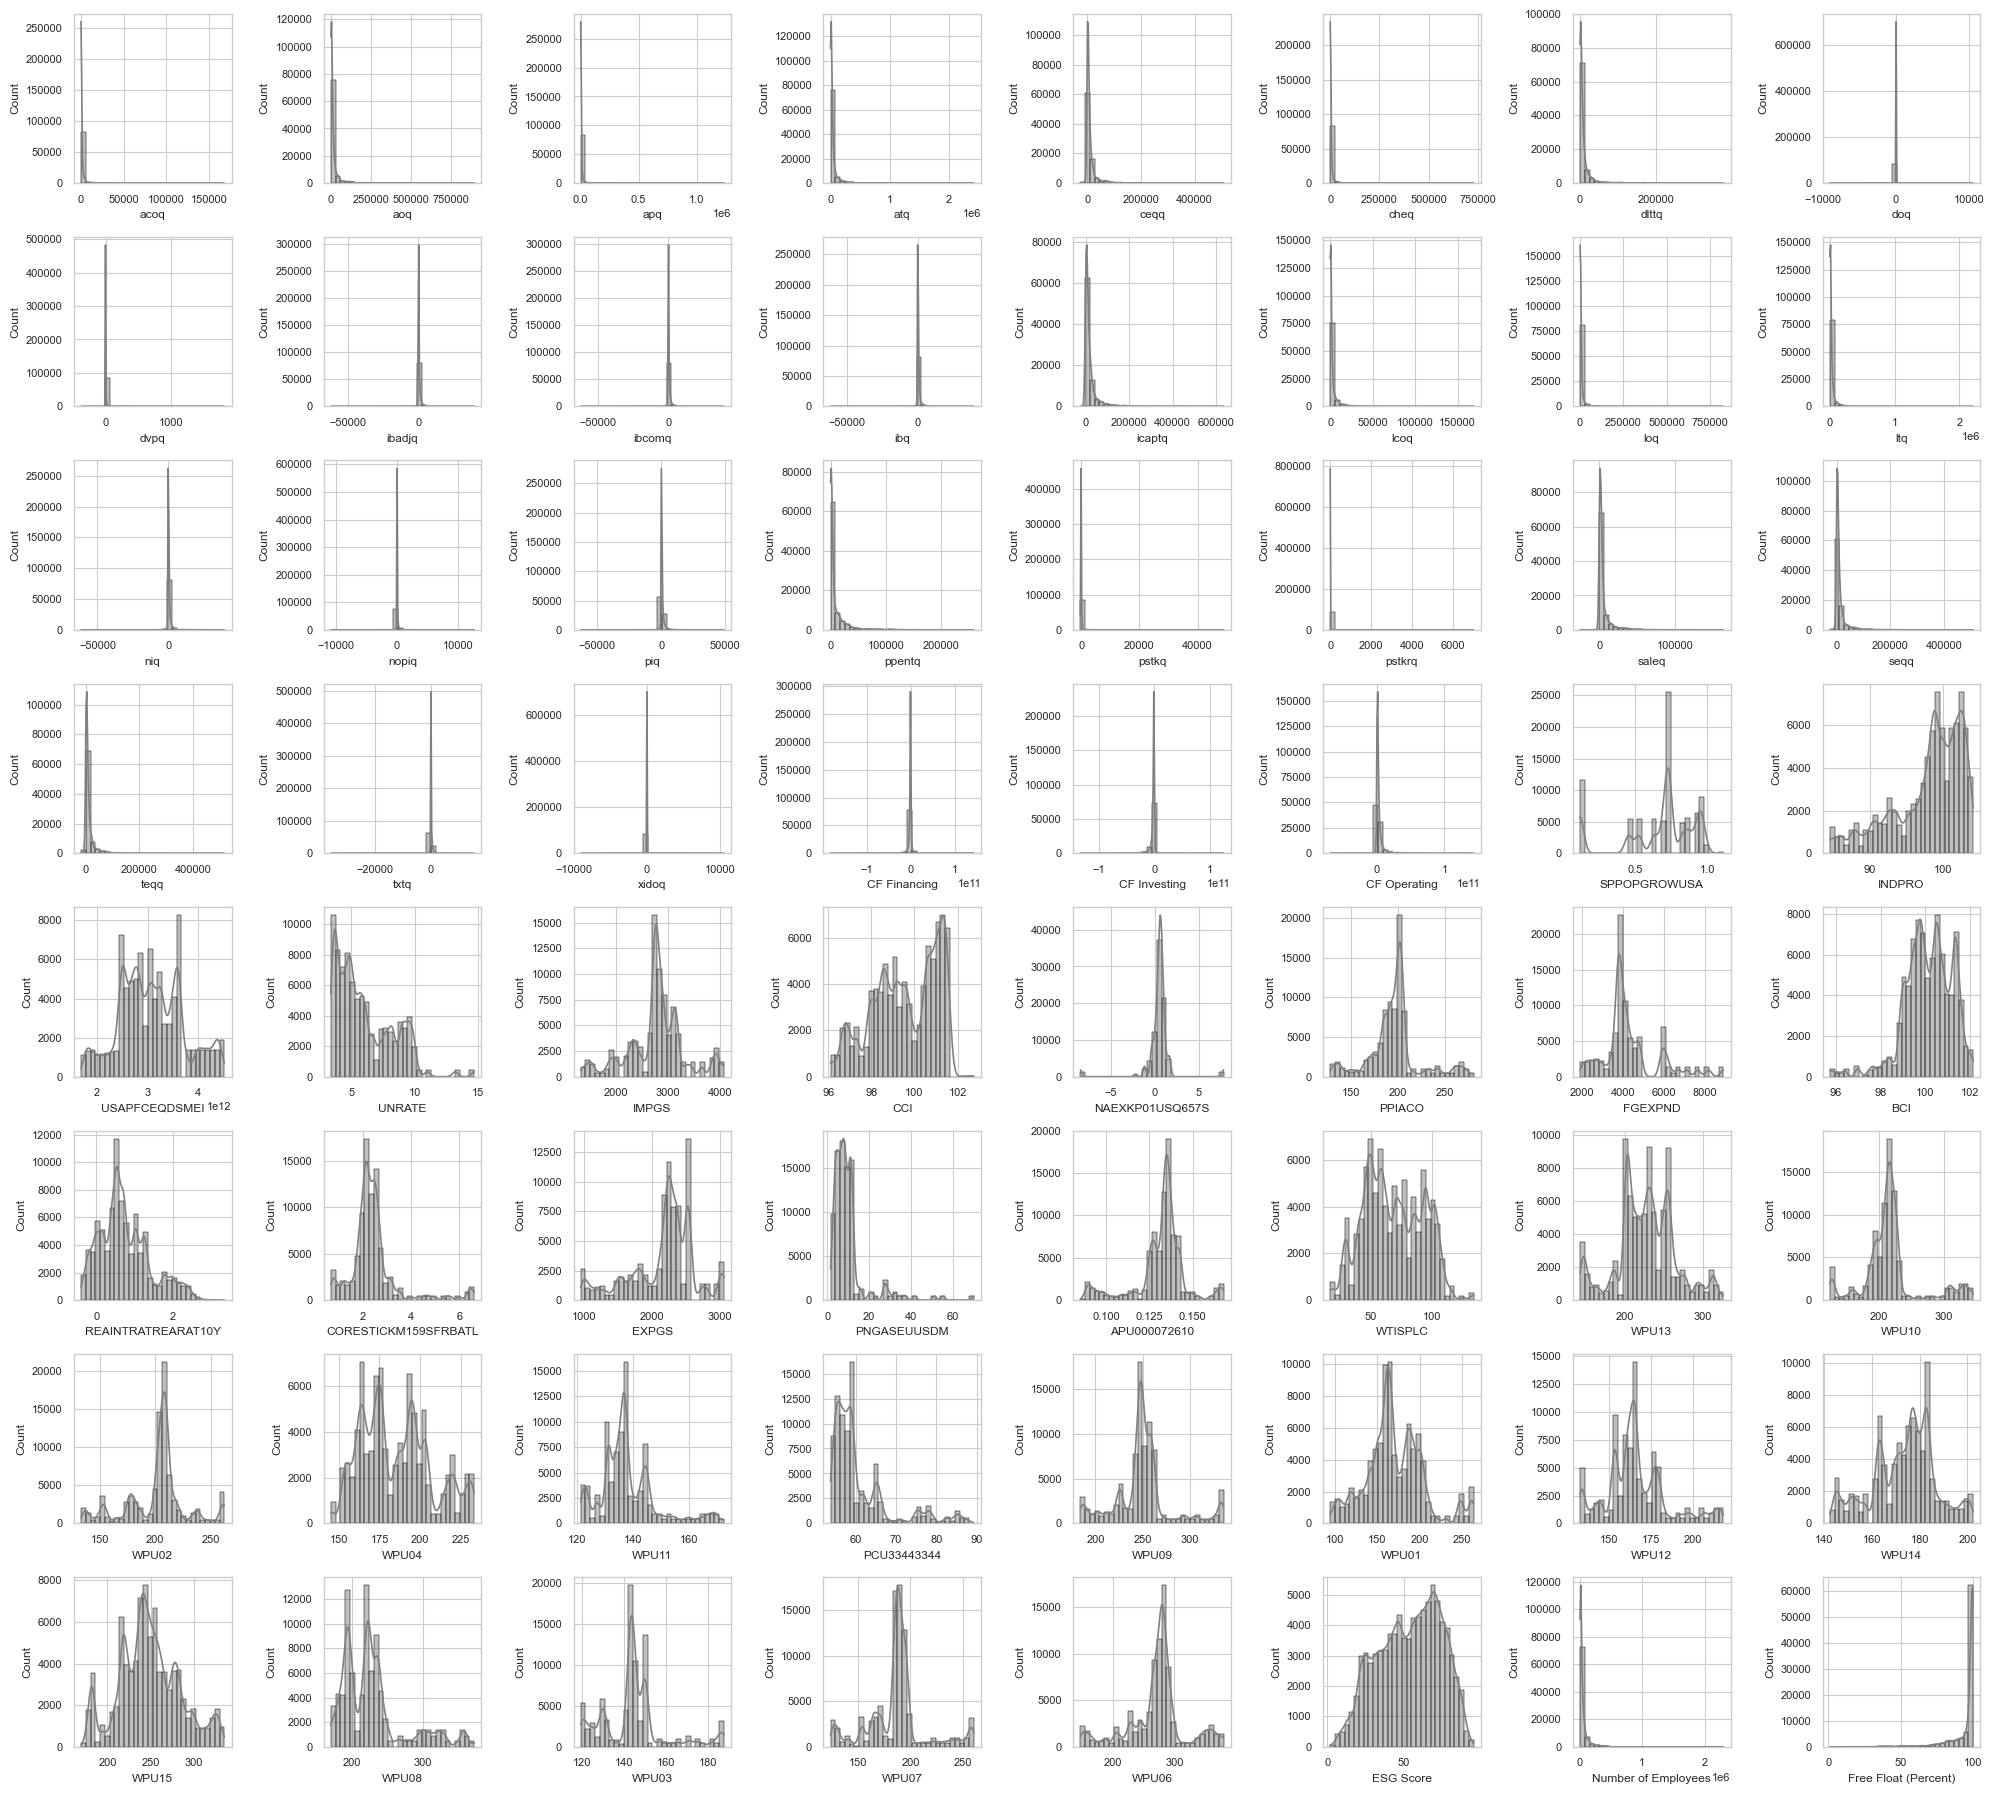

In [ ]:
# Set a theme for seaborn
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=0.9)


# Set the size of the whole figure
plt.figure(figsize=(20, 18))

n_cols = 8  
n_rows = 8 
num_bins = 30

# Create subplots
for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df, x=feature, bins=num_bins, color='grey', edgecolor='black', kde=True)


# Adjust the layout for better visualization
plt.tight_layout()

plt.savefig("visualisations/Histograms of numerical features", dpi=300, bbox_inches='tight')
plt.show()

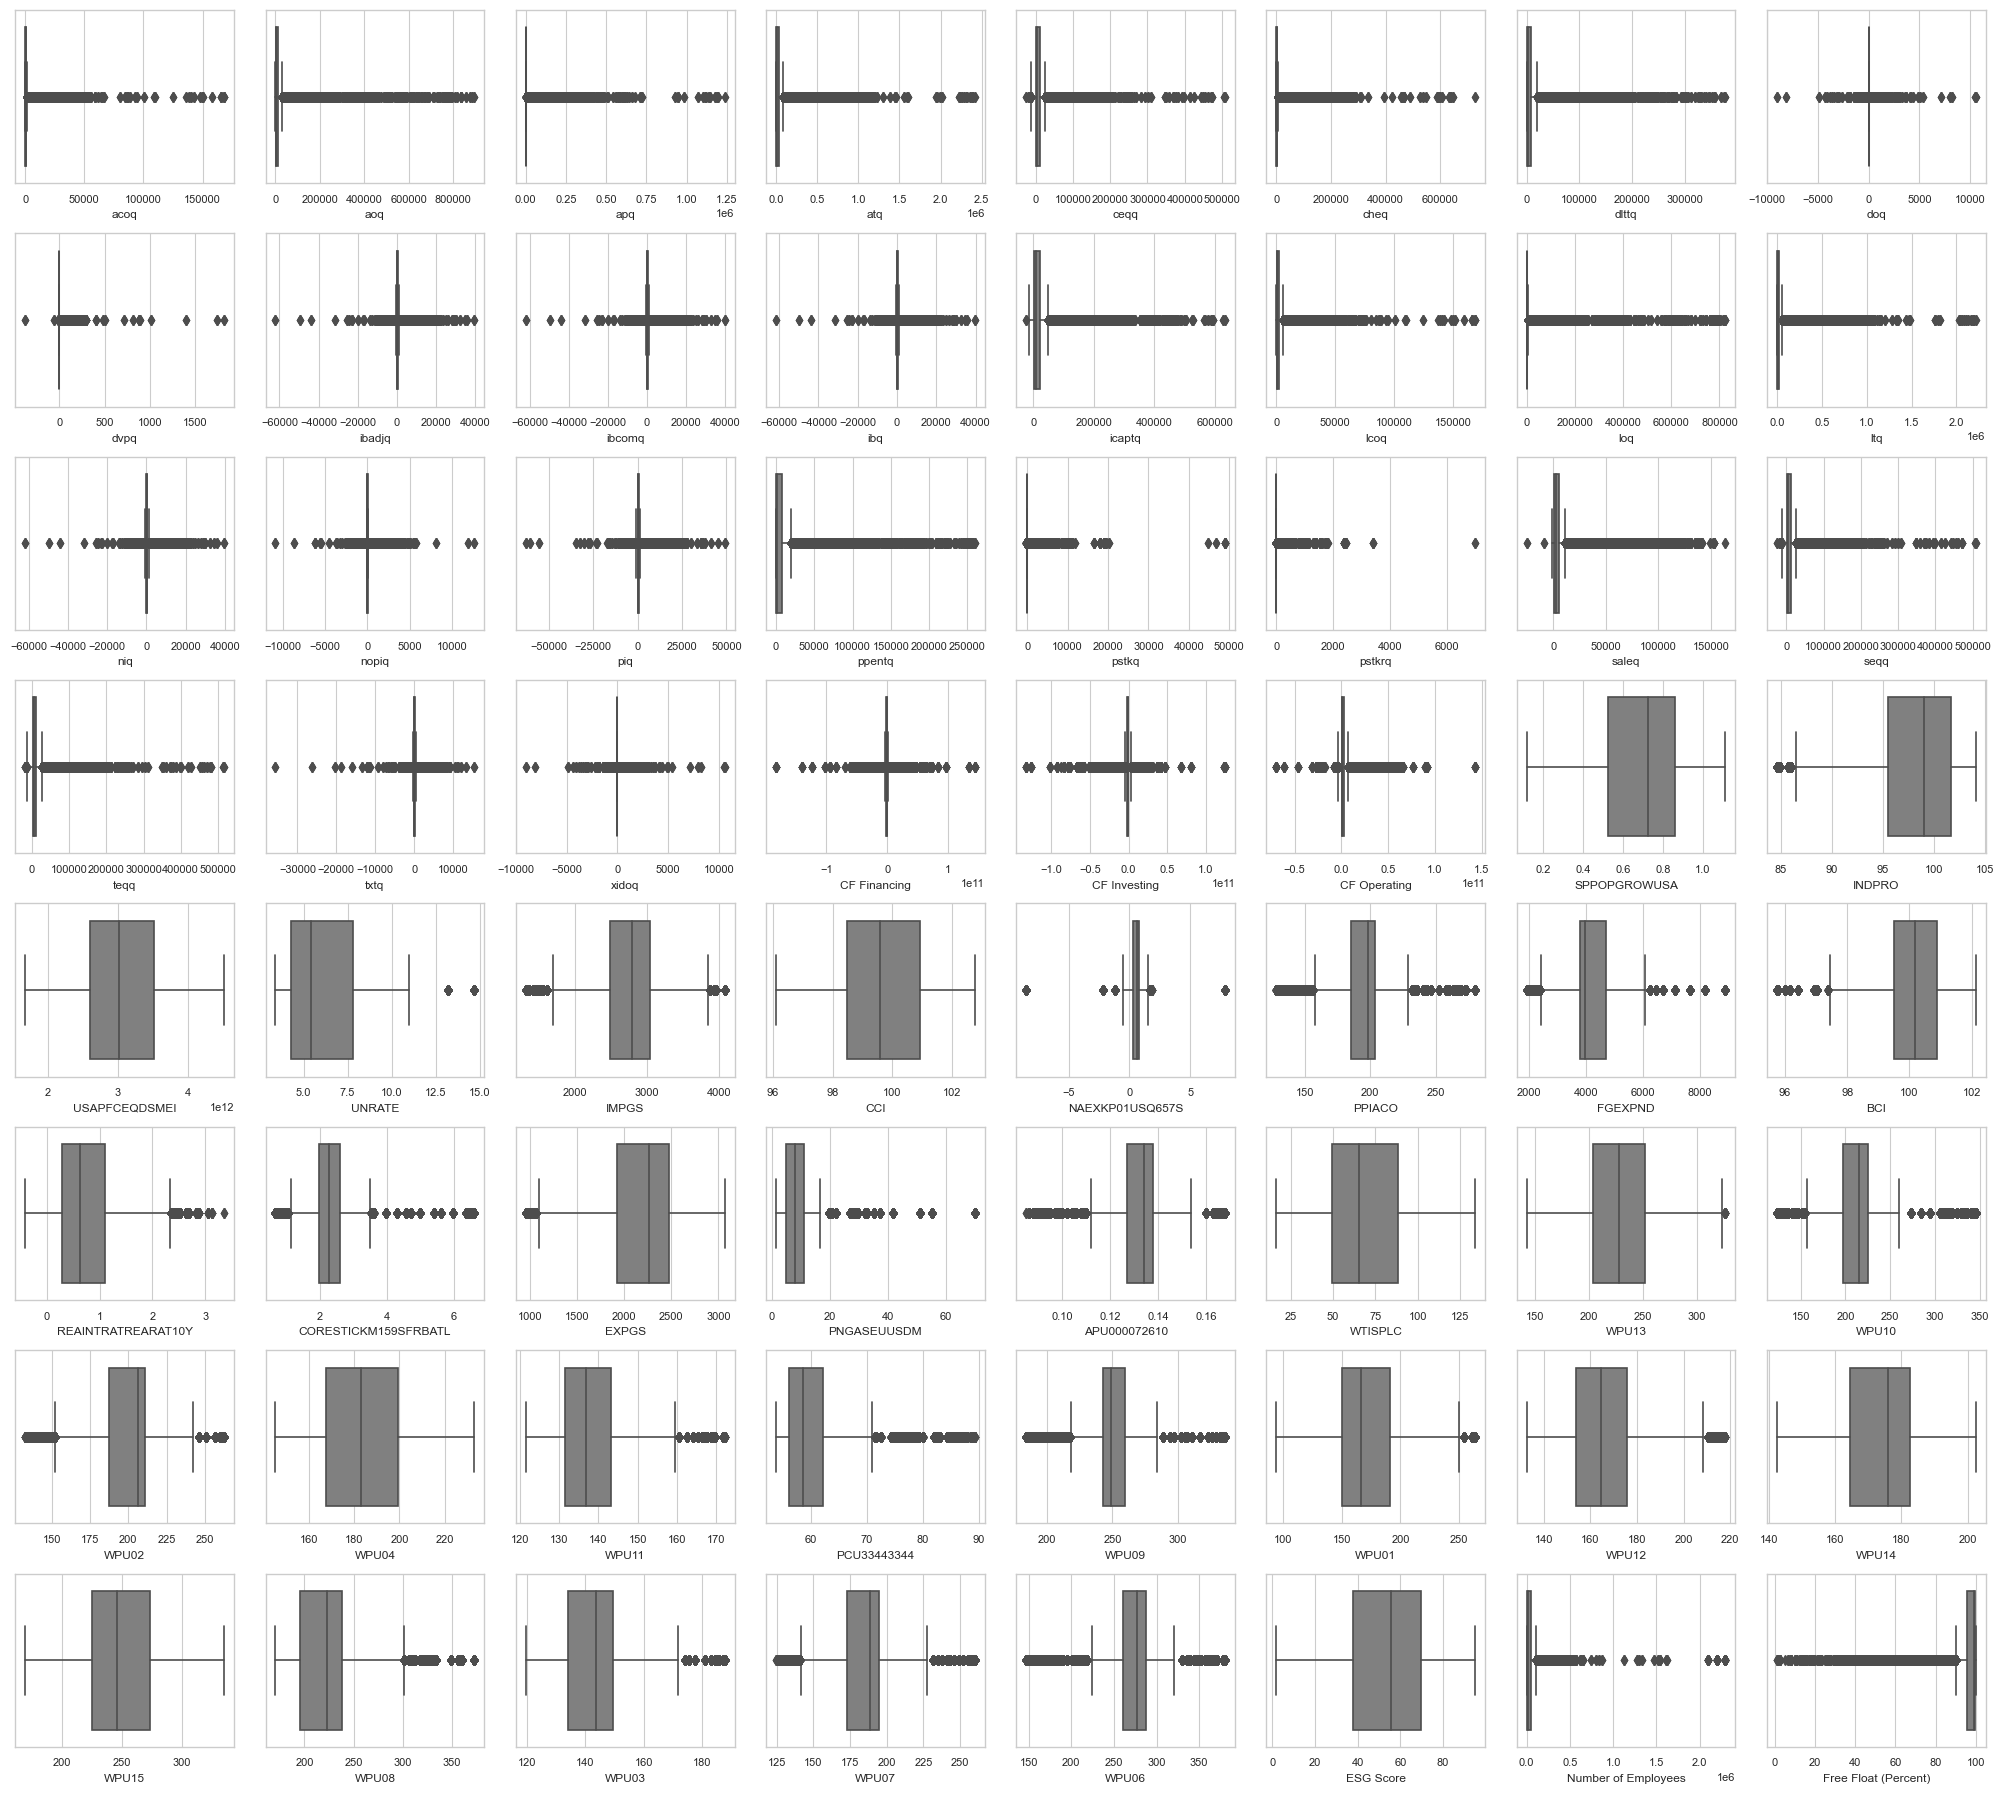

In [9]:
# Set a theme for seaborn
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=0.9)


# Set the size of the whole figure
plt.figure(figsize=(20, 18))

n_cols = 8  
n_rows = 8 
num_bins = 30

# Create subplots
for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, x=feature, color='grey')


# Adjust the layout for better visualization
plt.tight_layout()

plt.savefig("visualisations/Boxplots of numerical features", dpi=300, bbox_inches='tight')
plt.show()

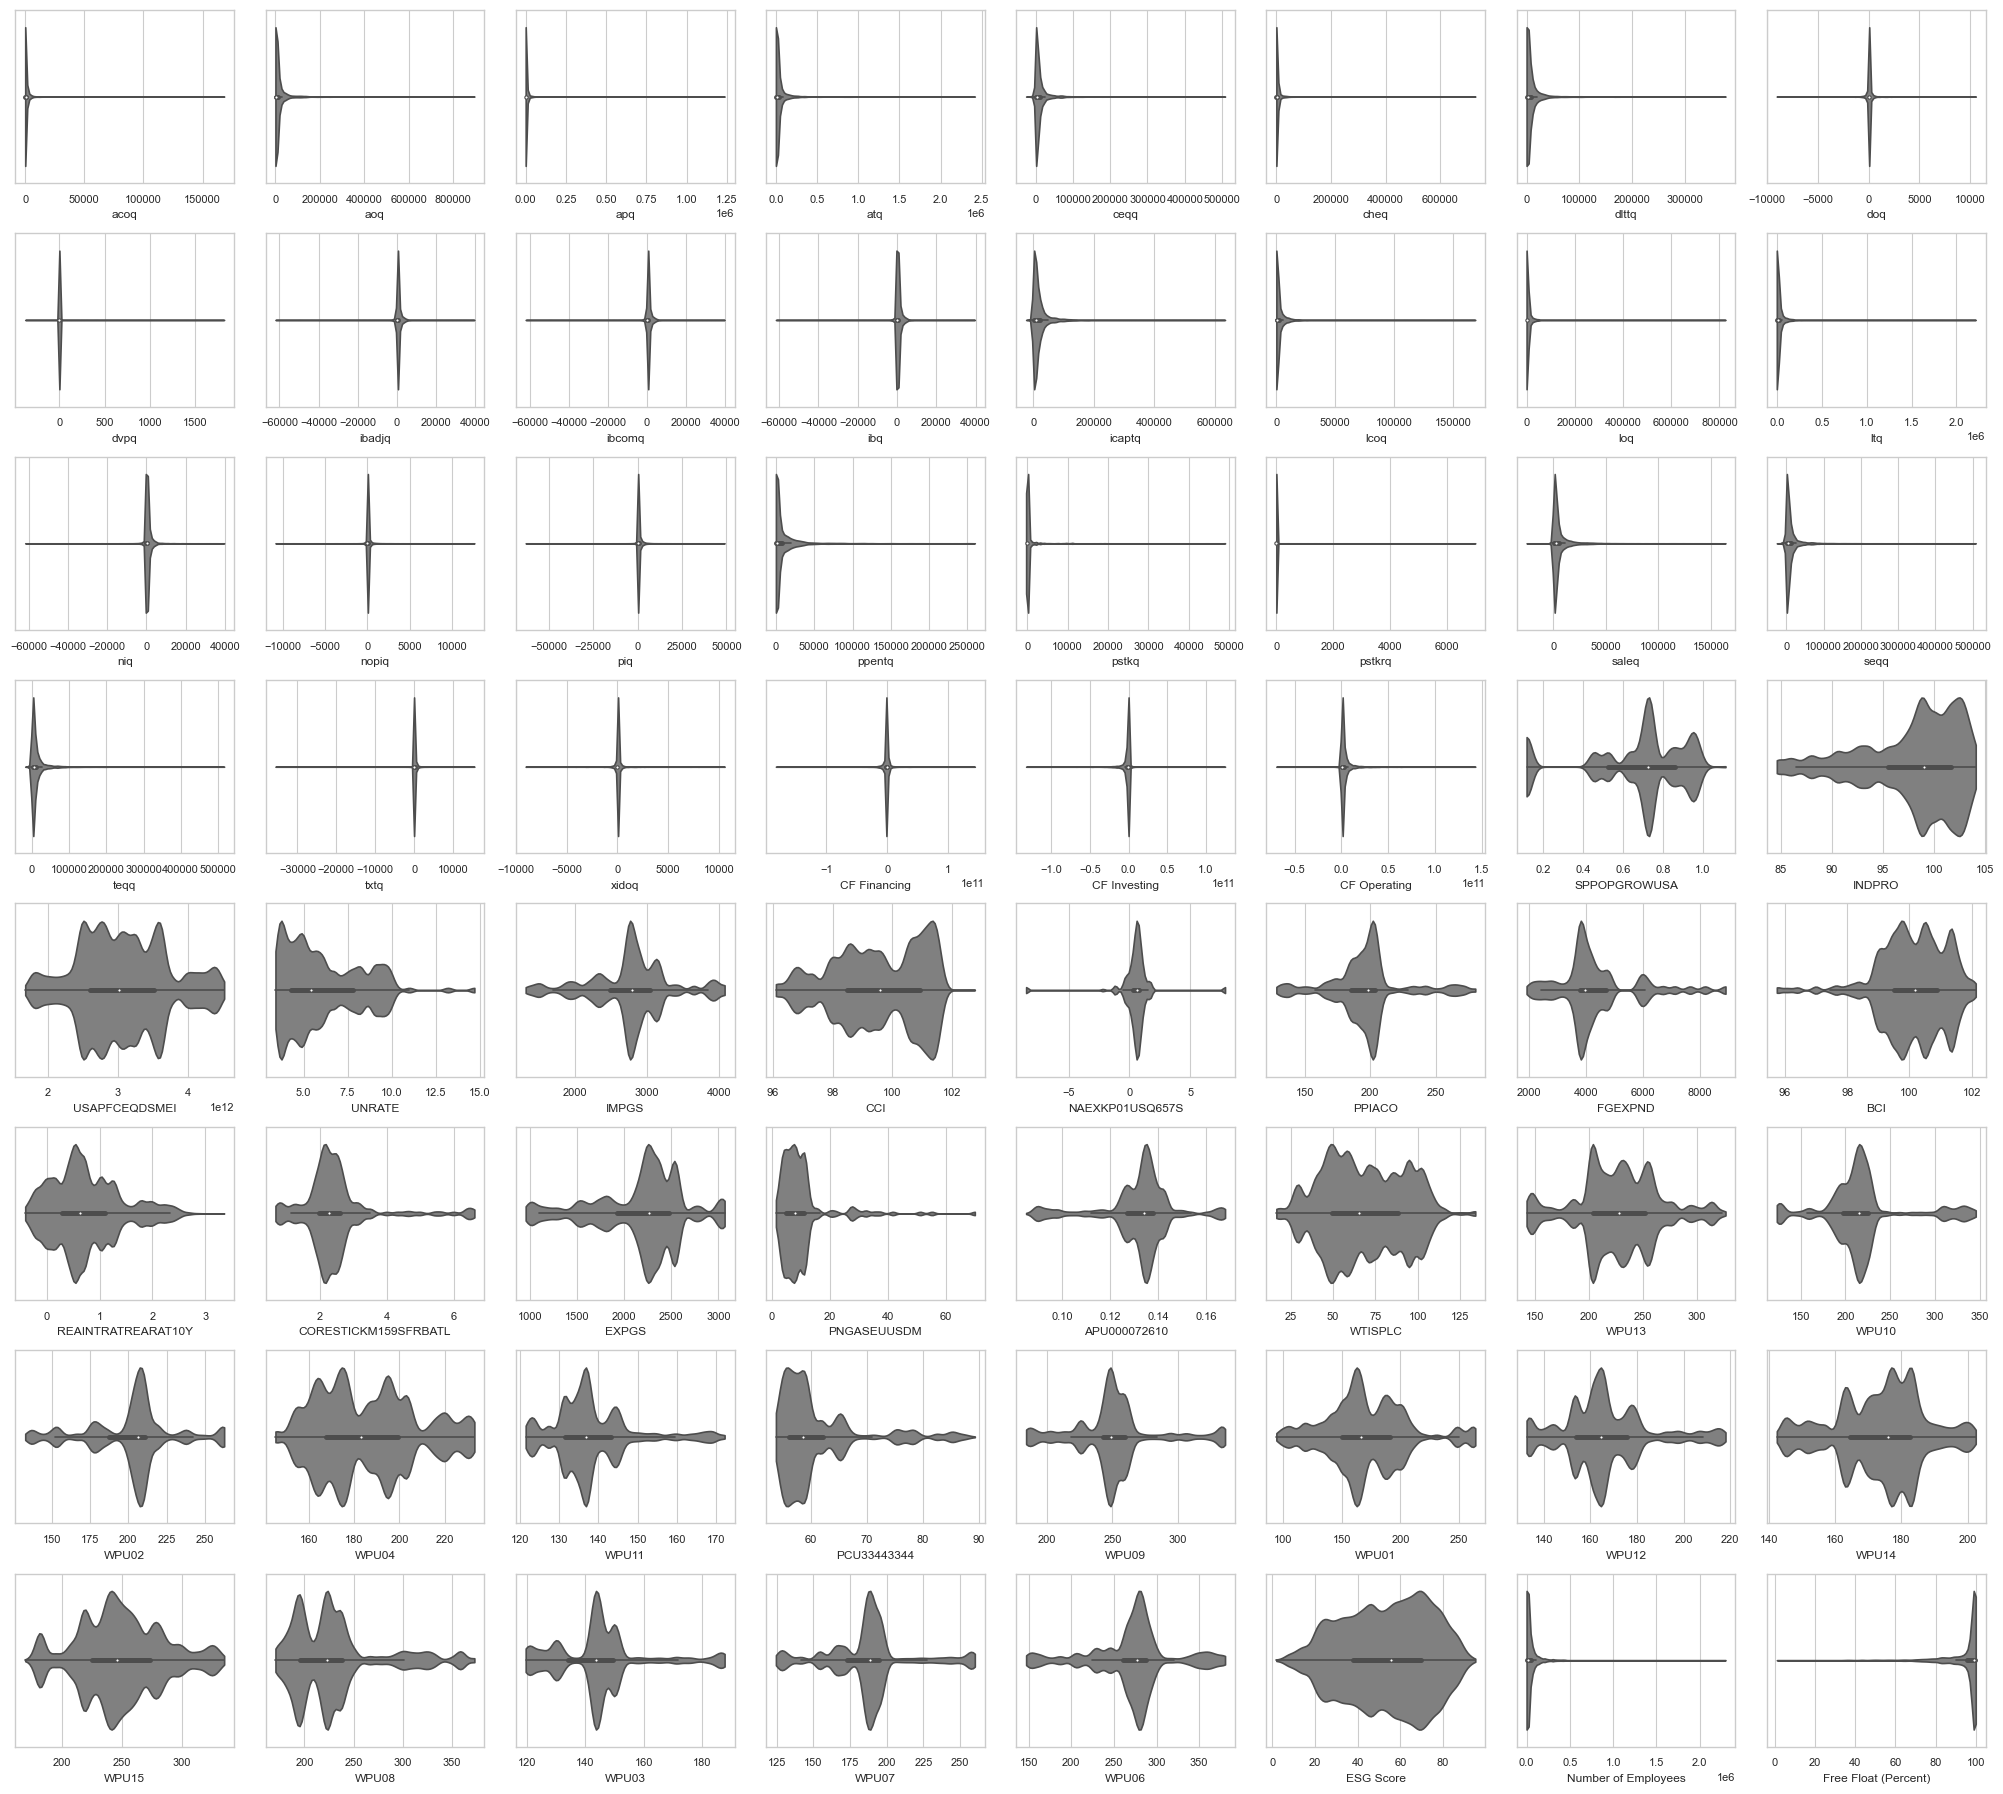

In [10]:
# Set a theme for seaborn
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=0.9)


# Set the size of the whole figure
plt.figure(figsize=(20, 18))

n_cols = 8  
n_rows = 8 
num_bins = 50

# Create subplots
for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(data=df, x=feature, cut=0, color="grey", hue="Over 100bn", split=True)


# Adjust the layout for better visualization
plt.tight_layout()

plt.savefig("visualisations/Violin plots of numeric features", dpi=300, bbox_inches='tight')
plt.show()

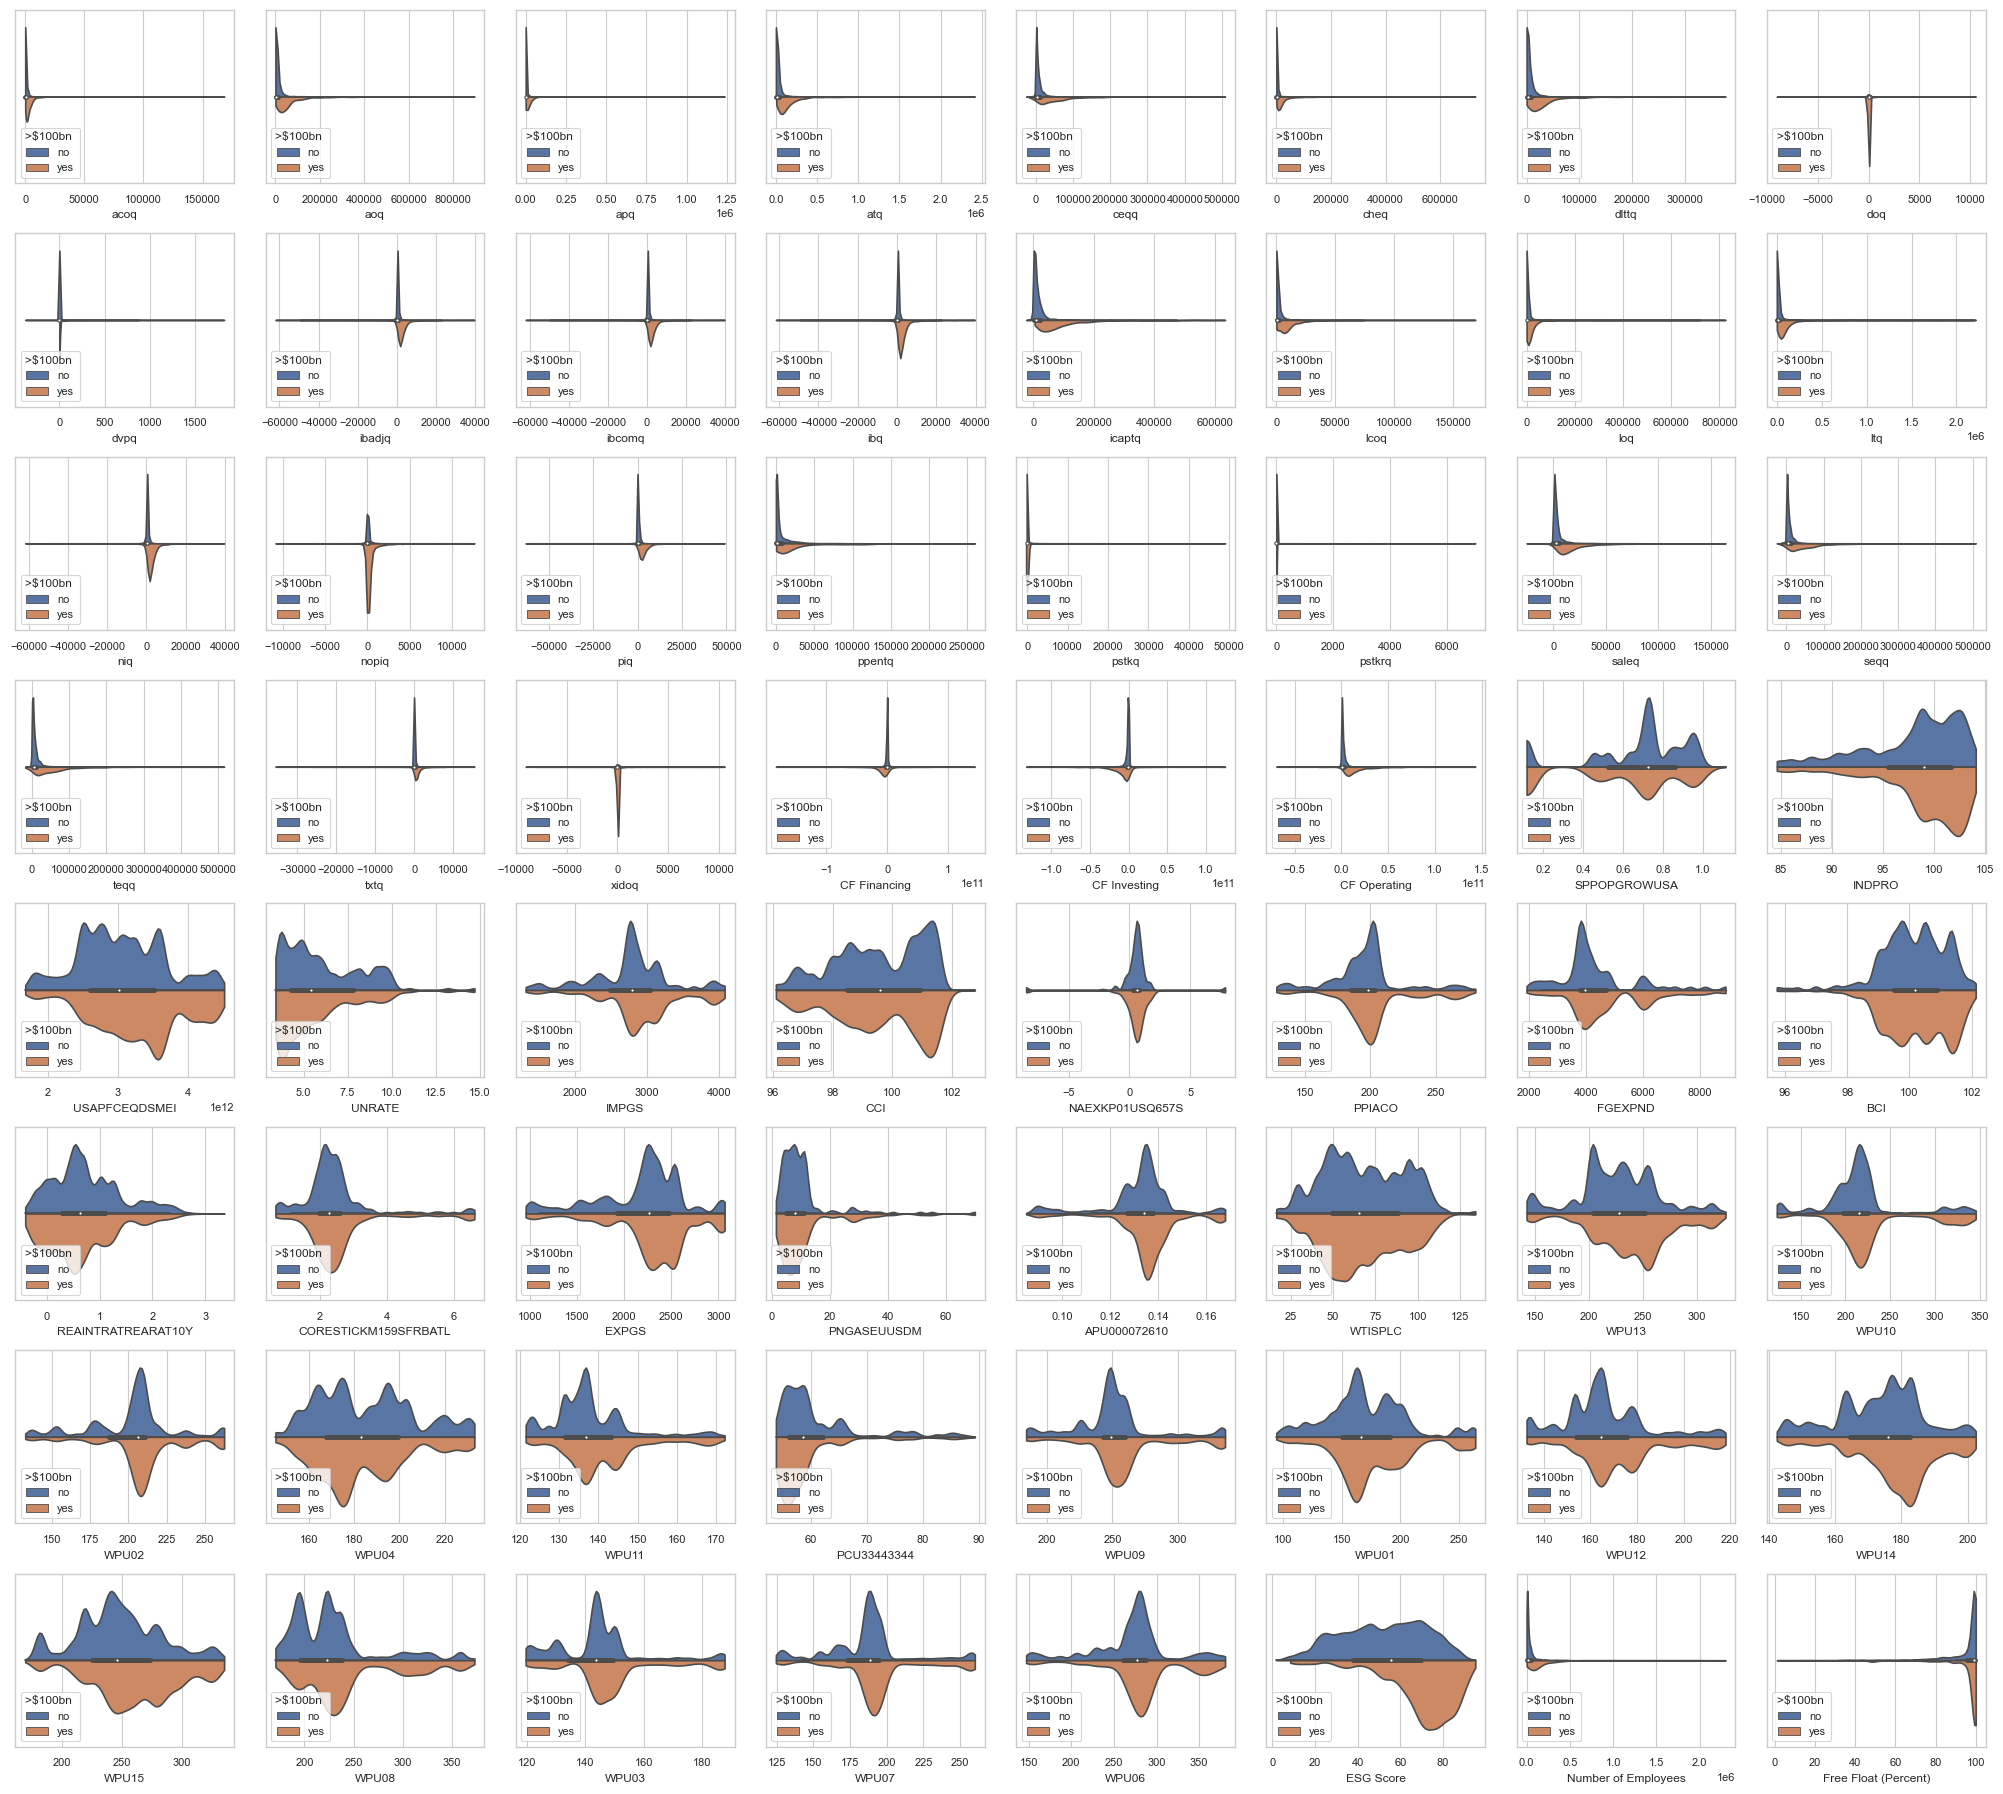

In [11]:
# Set a theme for seaborn
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=0.9)


# Set the size of the whole figure
plt.figure(figsize=(20, 18))

n_cols = 8  
n_rows = 8 
num_bins = 50

df["all"] = ""

# Create subplots
for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(data=df, x=feature, y="all", cut=0, hue="Over 100bn", split=True, palette="deep")#["Grey", "Blue"])
    plt.legend(loc='lower left', title=">$100bn ")
    plt.ylabel("")


# Adjust the layout for better visualization
plt.tight_layout()

plt.savefig("visualisations/Violin plots of numeric features by market cap", dpi=300, bbox_inches='tight')
plt.show()

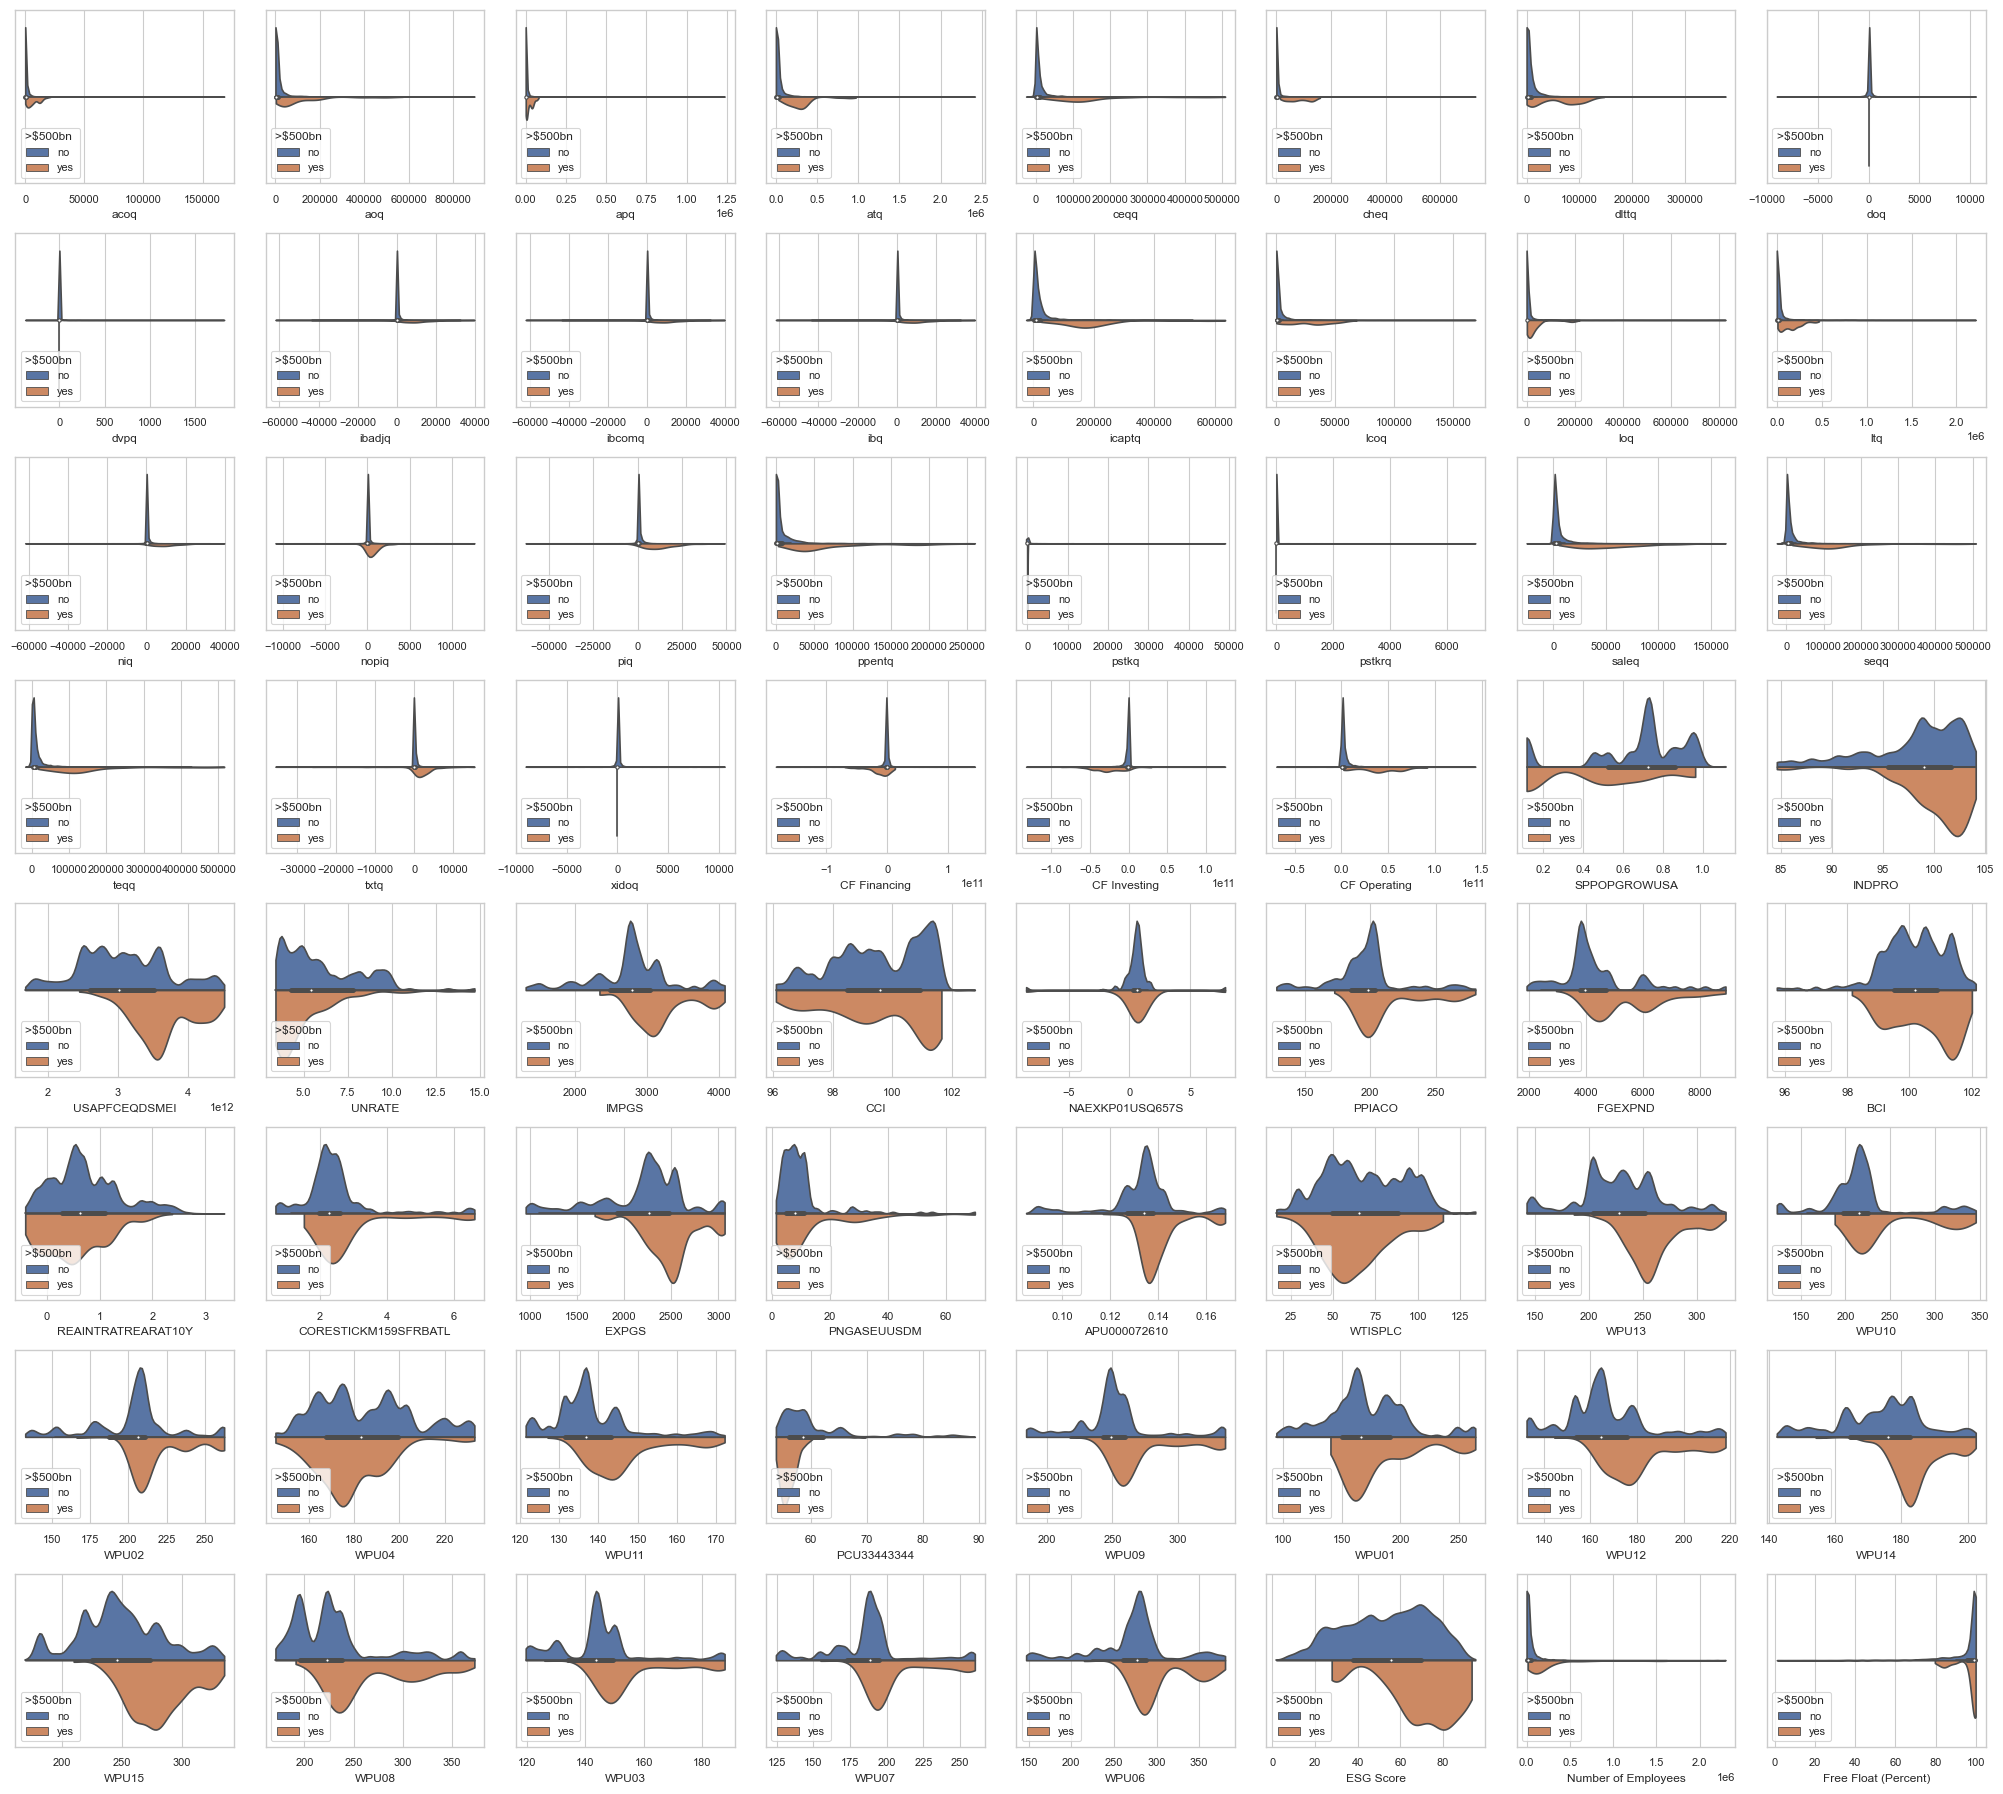

In [12]:
# Set a theme for seaborn
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=0.9)


# Set the size of the whole figure
plt.figure(figsize=(20, 18))

n_cols = 8  
n_rows = 8 
num_bins = 50

df["all"] = ""

# Create subplots
for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(data=df, x=feature, y="all", cut=0, hue="Over 500bn", split=True, palette="deep")#["Grey", "Blue"])
    plt.legend(loc='lower left', title=">$500bn ")
    plt.ylabel("")


# Adjust the layout for better visualization
plt.tight_layout()

plt.savefig("visualisations/Violin plots of numeric features by market cap over 500bn", dpi=300, bbox_inches='tight')
plt.show()

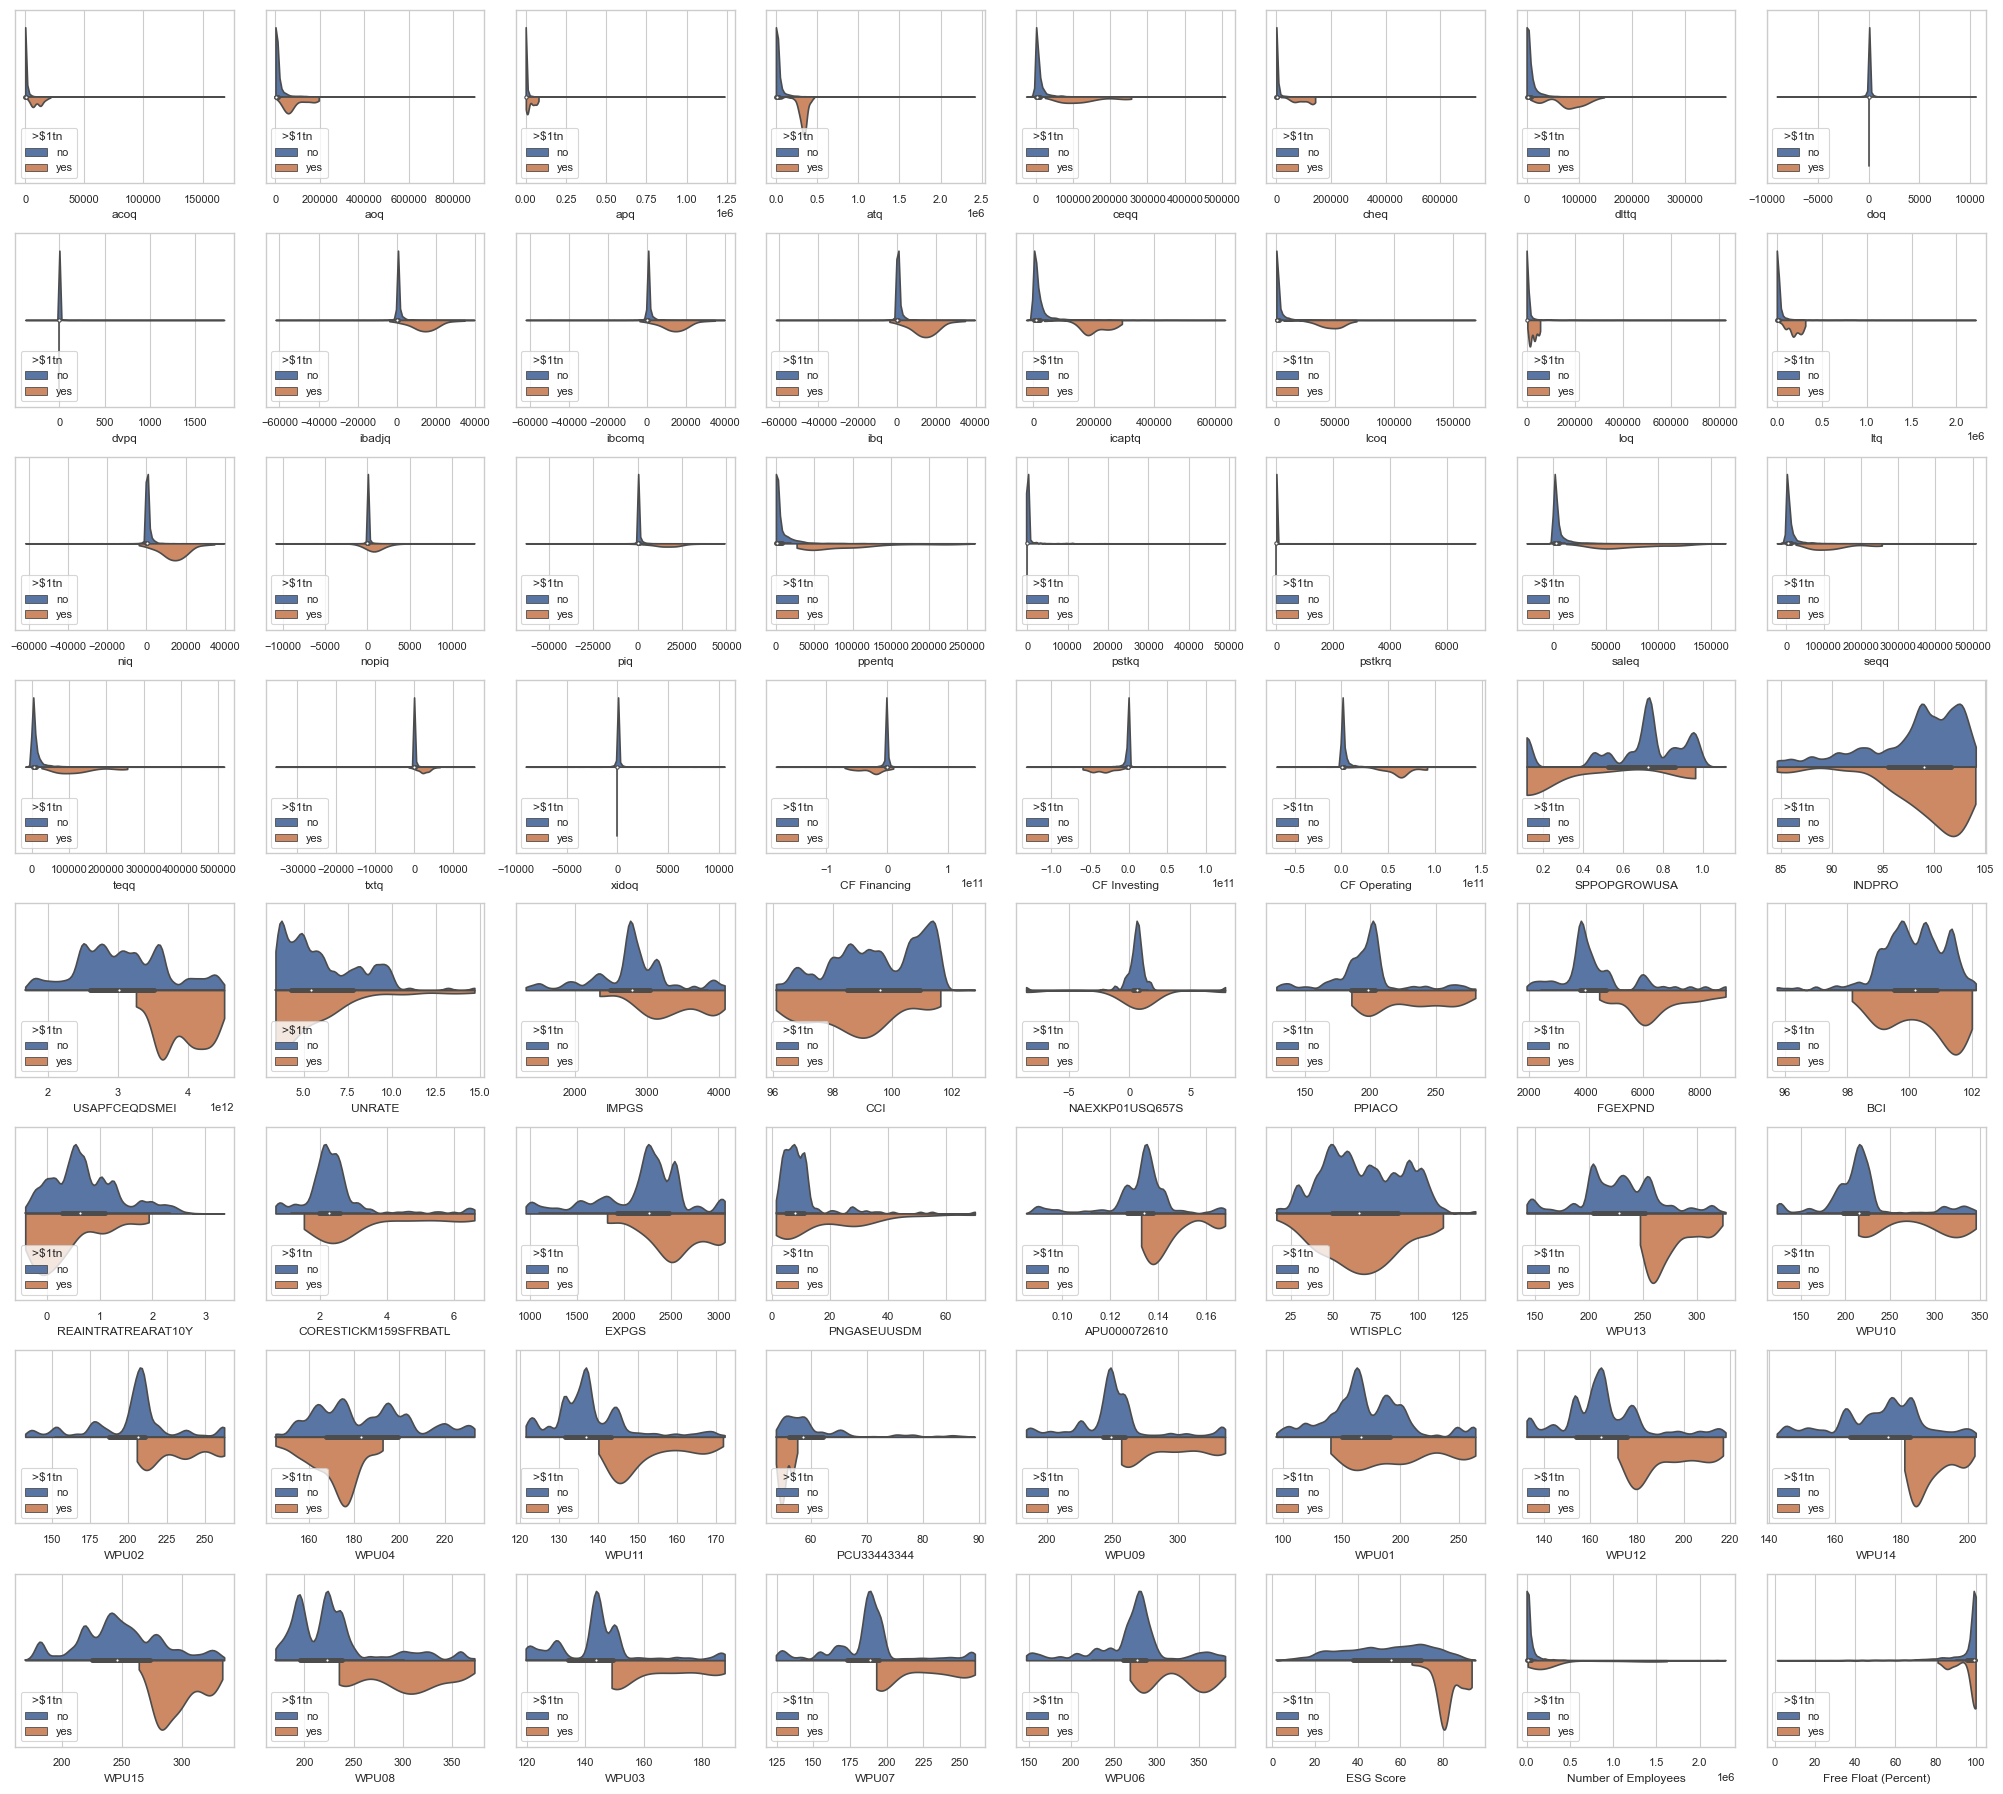

In [13]:
# Set a theme for seaborn
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=0.9)


# Set the size of the whole figure
plt.figure(figsize=(20, 18))

n_cols = 8  
n_rows = 8 
num_bins = 50

df["all"] = ""

# Create subplots
for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(data=df, x=feature, y="all", cut=0, hue="Over 1tr", split=True, palette="deep")#["Grey", "Blue"])
    plt.legend(loc='lower left', title=">$1tn ")
    plt.ylabel("")


# Adjust the layout for better visualization
plt.tight_layout()

# plt.savefig("visualisations/Violin plots of numeric features by market cap", dpi=300, bbox_inches='tight')
plt.show()

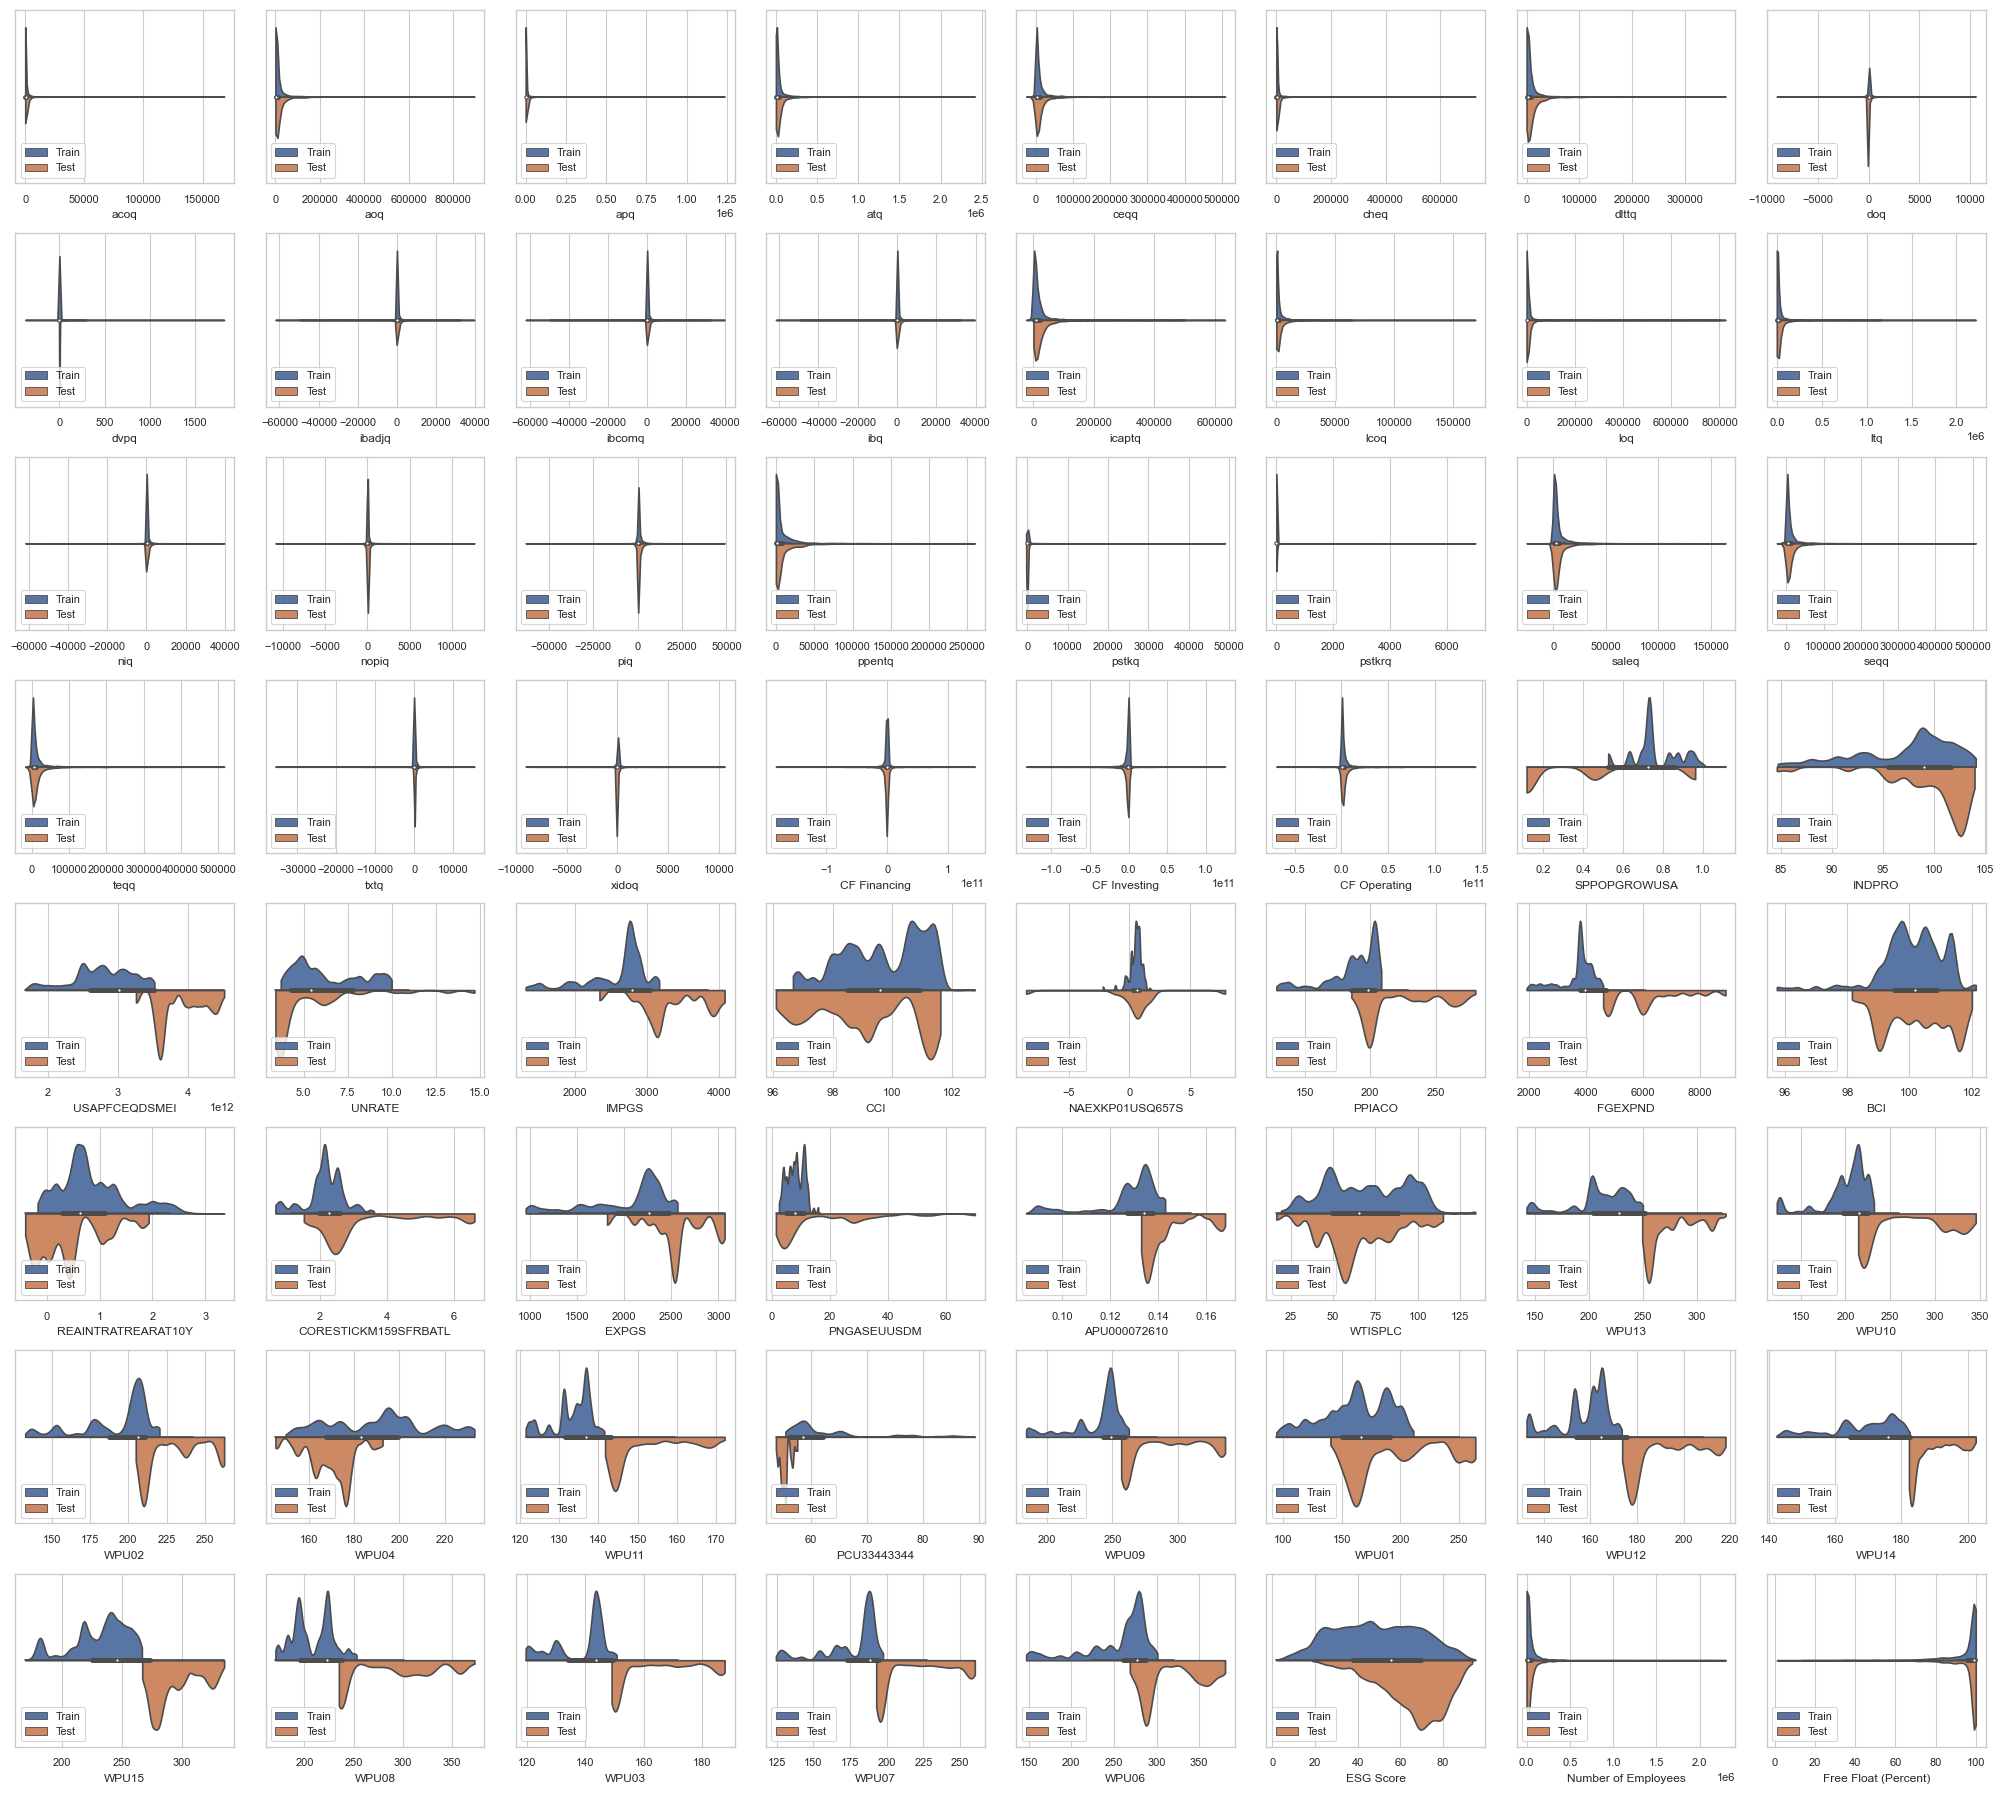

In [14]:
# Set a theme for seaborn
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=0.9)


# Set the size of the whole figure
plt.figure(figsize=(20, 18))

n_cols = 8  
n_rows = 8 
num_bins = 50

df["all"] = ""

# Create subplots
for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(data=df, x=feature, y="all", cut=0, hue="Set", split=True, palette="deep")#["Grey", "Blue"])
    plt.legend(loc='lower left')#, title=">$1tn ")
    plt.ylabel("")


# Adjust the layout for better visualization
plt.tight_layout()

plt.savefig("visualisations/Violin plots of numeric features by Train-Test-Split", dpi=300, bbox_inches='tight')
plt.show()

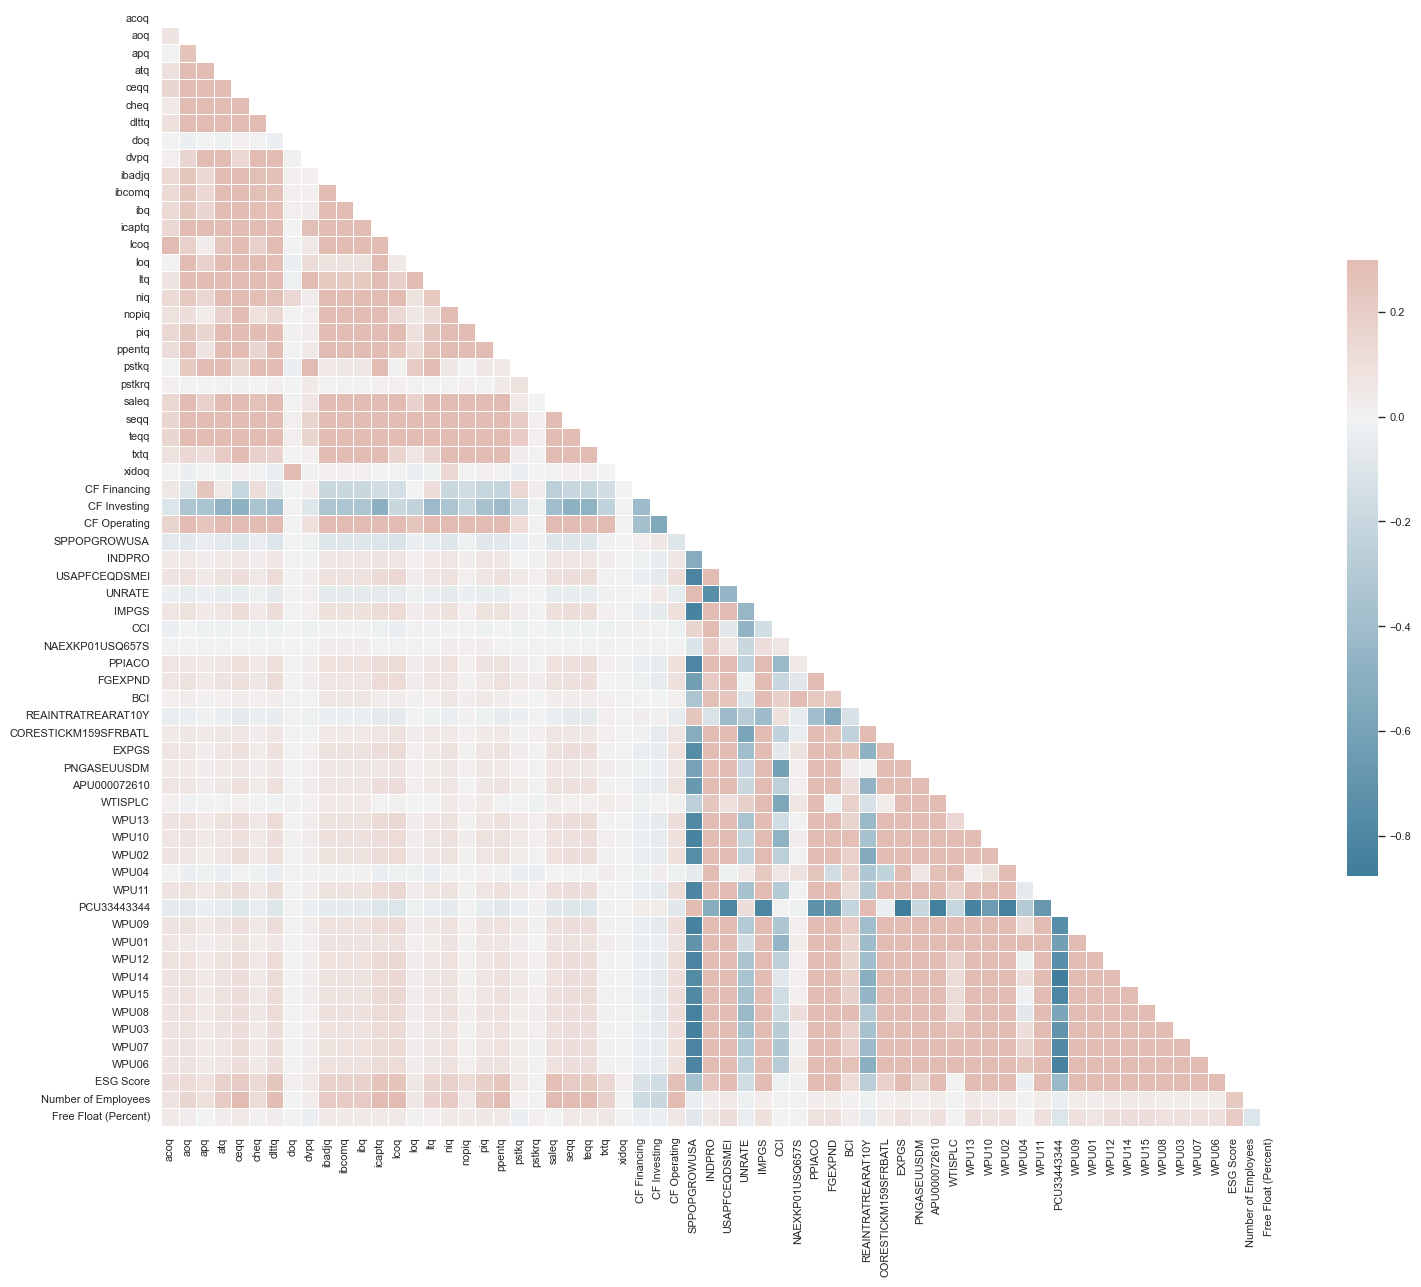

In [15]:
# Calculate the correlation matrix
corr_matrix = df[numerical_features].corr()

# Set a theme for seaborn
sns.set_theme(style="white")
sns.set_context("paper", font_scale=0.9)


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title
# plt.title('Correlation matrix of numerical features')
plt.savefig("visualisations/Correlation matrix numerical features", dpi=300, bbox_inches='tight')


# Show the plot
plt.show()

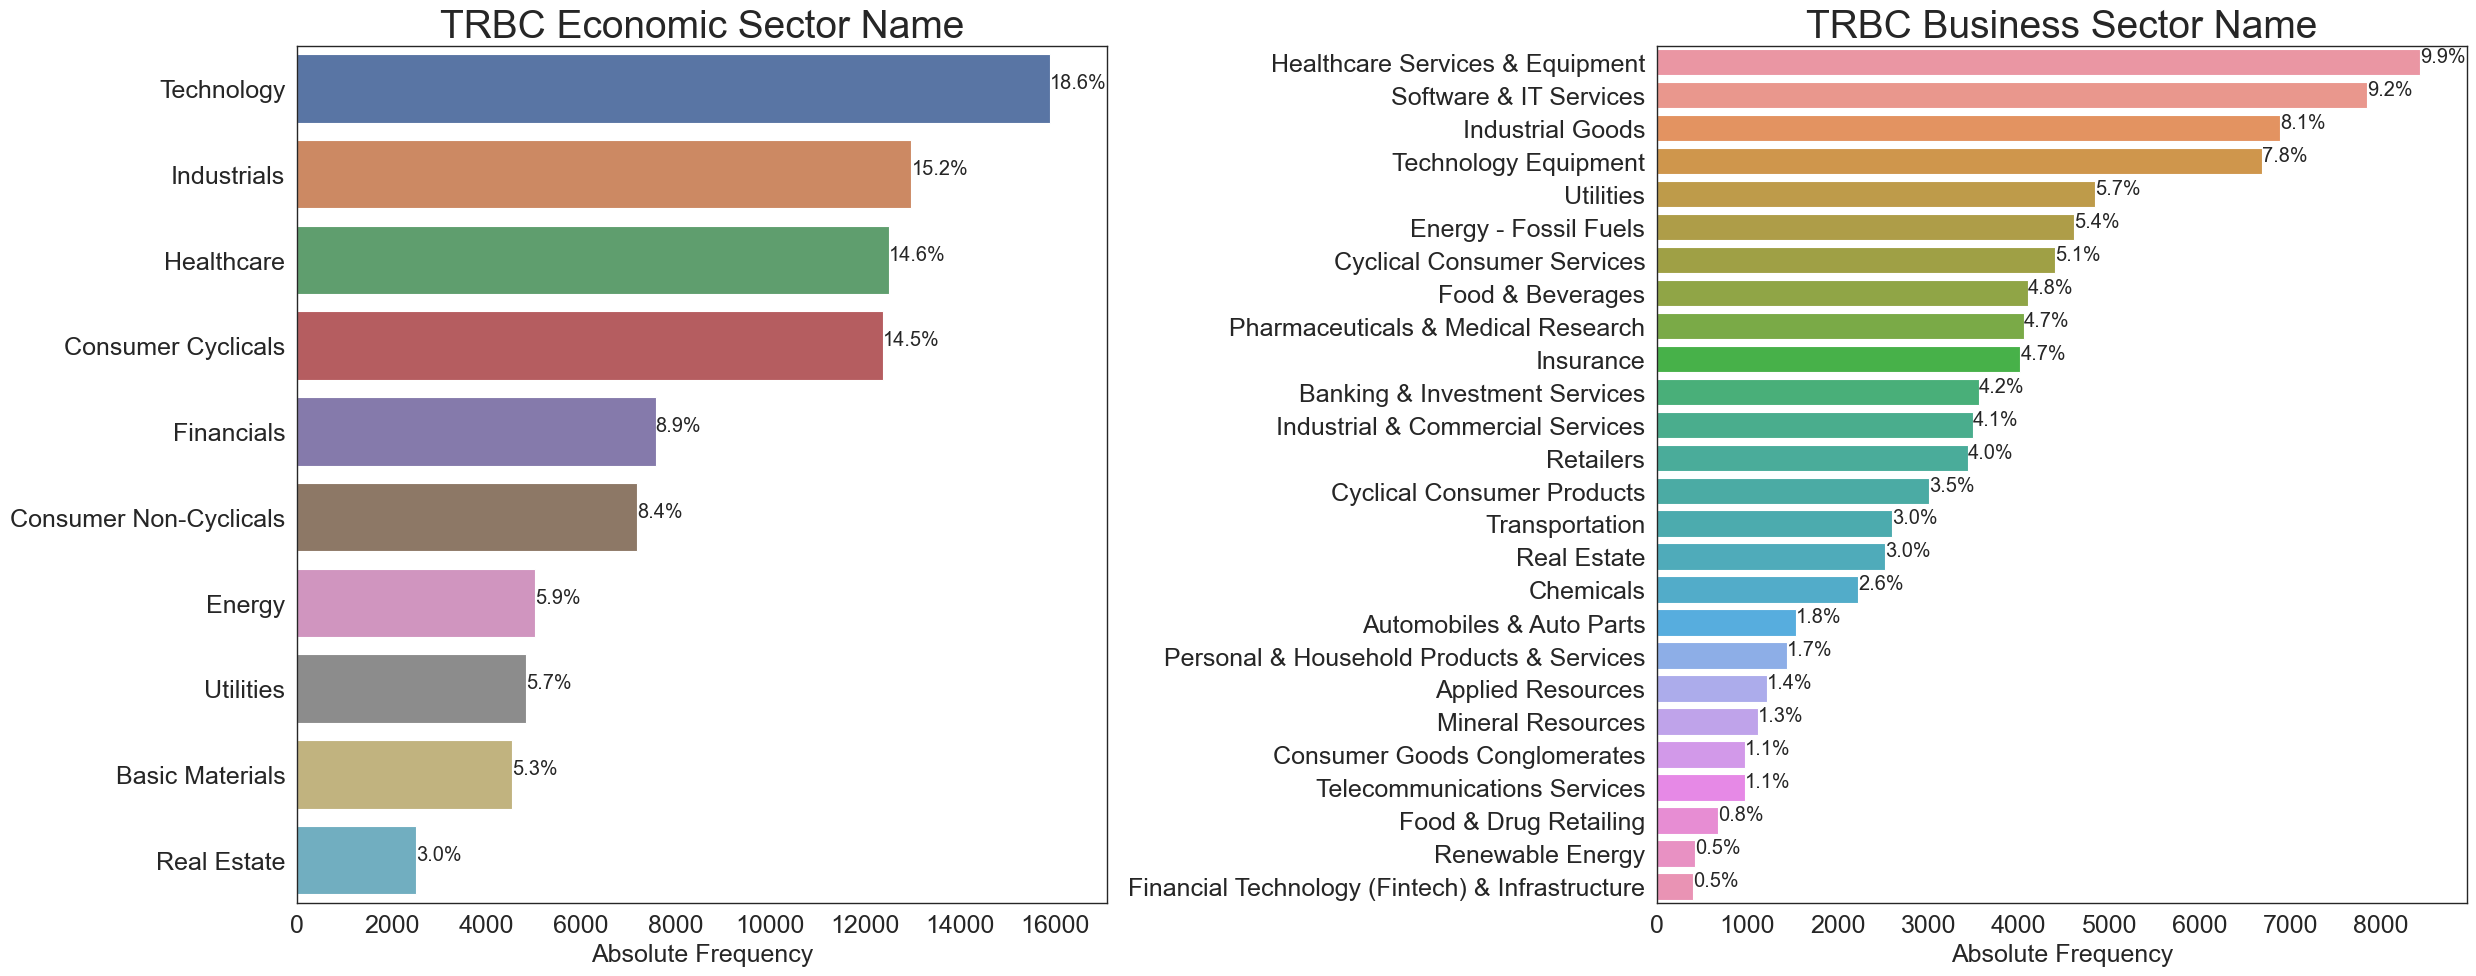

In [16]:
sns.set_theme(style="white")
sns.set_context("paper", font_scale=1.5)

# Assume df is your DataFrame and 'column1' and 'column2' are the columns of interest
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

# Plot for column1
sns.countplot(y='TRBC Economic Sector Name', data=df, order=df['TRBC Economic Sector Name'].value_counts().index, ax=ax[0])
total1 = len(df['TRBC Economic Sector Name'])
for p in ax[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax[0].annotate(percentage, (x, y))
ax[0].set_title('TRBC Economic Sector Name', fontsize=28)
ax[0].set_ylabel('')
ax[0].set_xlabel('Absolute Frequency', fontsize=18)
ax[0].tick_params(labelsize=18)
ax[0].set_xlim(0, 17100)



# Plot for column2
sns.countplot(y='TRBC Business Sector Name', data=df, order=df['TRBC Business Sector Name'].value_counts().index, ax=ax[1])
total2 = len(df['TRBC Business Sector Name'])
for p in ax[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total2)
    x = p.get_x() + p.get_width() 
    y = p.get_y() + p.get_height()/2
    ax[1].annotate(percentage, (x, y))
ax[1].set_title('TRBC Business Sector Name', fontsize=28)
ax[1].set_ylabel('')
ax[1].set_xlabel('Absolute Frequency', fontsize=18)
ax[1].tick_params(labelsize=18)
ax[1].set_xlim(0, 8950)


plt.tight_layout()

plt.savefig("visualisations/TRBC industry classification frequencies", dpi=300, bbox_inches='tight')
plt.show()


## Raw Returns vs Alpha Visualisation

In [17]:
def vis1(models):
    """
    Loads and returns data to plot for first visualisation (raw returns).
    """
    
    df_list = []
    
    try:
        for i in range(len(models)):
            df_list.append(pd.read_csv(f'model_evaluations_3/{models[i]}.csv'))
    except:
        for i in range(len(models)):
            df_list.append(pd.read_csv(f'model_evaluations_3/{models[i]}'))
    
    
    to_plot = []
    
    for i in range(len(df_list)):
        to_plot.append(df_list[i][['Next 1M Return (%)', 'Next 6M Return (%)', 'Next 12M Return (%)']])
    
                
    
    return to_plot, df_list


In [18]:
best_models = ["RF (no log, yes pca)", "NN 3HL64N (no log, yes pca)", 
               "ELM (no log, yes pca)", "ELM (yes log, yes pca)"]

titles = ["RF (pca)", "MLP 3/64 (pca)", "ELM (pca)", "ELM (log, pca)"]

to_plot, df_list = vis1(best_models)
to_plot

[   Next 1M Return (%)  Next 6M Return (%)  Next 12M Return (%)
 0            0.667468            4.363048            10.045609
 1            1.009892            5.737088            11.100916
 2            0.839413            5.335790            11.405154
 3            1.334202            7.394951            15.385504
 4            2.737767           15.667508            37.286776,
    Next 1M Return (%)  Next 6M Return (%)  Next 12M Return (%)
 0            1.029925            6.731858            14.429664
 1            0.804027            5.520717            11.797036
 2            1.000893            5.907994            11.887577
 3            1.133632            6.802788            13.957713
 4            2.630131           13.368128            33.017658,
    Next 1M Return (%)  Next 6M Return (%)  Next 12M Return (%)
 0            0.798350            4.292532             6.671694
 1            0.824349            5.472681            11.311099
 2            1.178855            7.02

In [19]:
to_plot[3].iloc[0::4].T

0          4
Next 1M Return (%)   0.299627   2.595573
Next 6M Return (%)   2.599101  12.716868
Next 12M Return (%)  0.611145  30.695150

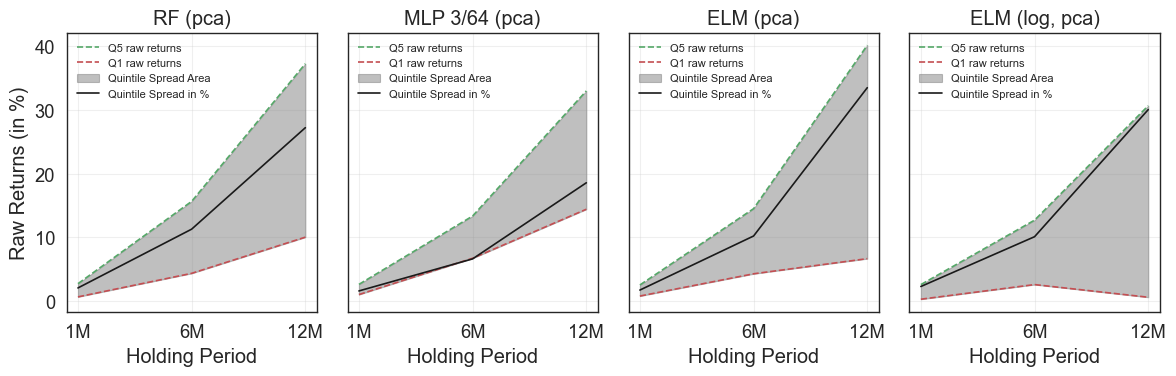

In [20]:

fig, ax = plt.subplots(1, 4, sharey=True, figsize=(12, 4))

ax[0].set_ylabel('Raw Returns (in %)')

x = ['1M', '6M', '12M']

for i in range(len(best_models)):
    ax[i].plot(x, to_plot[i].iloc[4].T, 'g--', label='Q5 raw returns')
    ax[i].plot(x, to_plot[i].iloc[0].T, 'r--', label='Q1 raw returns')
    ax[i].fill_between(x, to_plot[i].iloc[0].T, to_plot[i].iloc[4].T, label= 'Quintile Spread Area', color='grey', alpha=0.5)
    ax[i].plot(x, to_plot[i].iloc[4].T - to_plot[i].iloc[0].T, 'k-', label='Quintile Spread in %')

    ax[i].set_xlabel('Holding Period')

    ax[i].set_title(titles[i])

    ax[i].legend(fontsize=8, frameon=False, loc='upper left')

    ax[i].grid(alpha=0.3)
    
    plt.tight_layout()

In [21]:
alpha_df = EstAlpha.est_alphas_summary(best_models, 'FF5FM', 'stock', save_as=None)
alpha_df

Q1 1M     Q2 1M     Q3 1M     Q4 1M     Q5 1M   
RF (no log, yes pca)         0.398961  0.605524  0.412080  0.787241  1.957894  \
NN 3HL64N (no log, yes pca)  0.588269  0.382617  0.621246  0.650385  1.903788   
ELM (no log, yes pca)        0.563860  0.383349  0.646660  0.684605  1.601661   
ELM (yes log, yes pca)      -0.755127  0.246624  0.947041  1.300691  1.499268   

                             Q5-Q1 1M     Q1 6M     Q2 6M     Q3 6M     Q4 6M   
RF (no log, yes pca)         1.558933  2.863191  0.759860 -2.383471 -0.883597  \
NN 3HL64N (no log, yes pca)  1.315519  0.903536 -0.431014 -0.562156 -1.040812   
ELM (no log, yes pca)        1.037800 -0.842697 -0.066192  0.298038 -1.038838   
ELM (yes log, yes pca)       2.254395 -6.708299  4.944049 -1.345302  2.722708   

                             ...  Q3 6M p-value  Q4 6M p-value  Q5 6M p-value   
RF (no log, yes pca)         ...       0.000013       0.169968       0.225159  \
NN 3HL64N (no log, yes pca)  ...       0.321763       0.078243       0.214737   
ELM (no log, yes pca)        ...       0.652047       0.099552       0.000070   
ELM (yes log, yes pca)       ...       0.092060       0.000645       0.001942   

                             Q5-Q1 6M p-value  Q1 12M p-value  Q2 12M p-value   
RF (no log, yes pca)             5.111739e-04        0.041923        0.001170  \
NN 3HL64N (no log, yes pca)      3.656936e-01        0.814457        0.358263   
ELM (no log, yes pca)            2.312666e-05        0.001876        0.381375   
ELM (yes log, yes pca)           3.713099e-08        0.014009        0.000010   

                             Q3 12M p-value  Q4 12M p-value  Q5 12M p-value   
RF (no log, yes pca)               0.003786        0.553133        0.499323  \
NN 3HL64N (no log, yes pca)        0.329809        0.988305        0.555023   
ELM (no log, yes pca)              0.017972        0.396693        0.036897   
ELM (yes log, yes pca)             0.004454        0.000019        0.003973   

                             Q5-Q1 12M p-value  
RF (no log, yes pca)                  0.040693  
NN 3HL64N (no log, yes pca)           0.334435  
ELM (no log, yes pca)                 0.000965  
ELM (yes log, yes pca)                0.000355  

[4 rows x 36 columns]

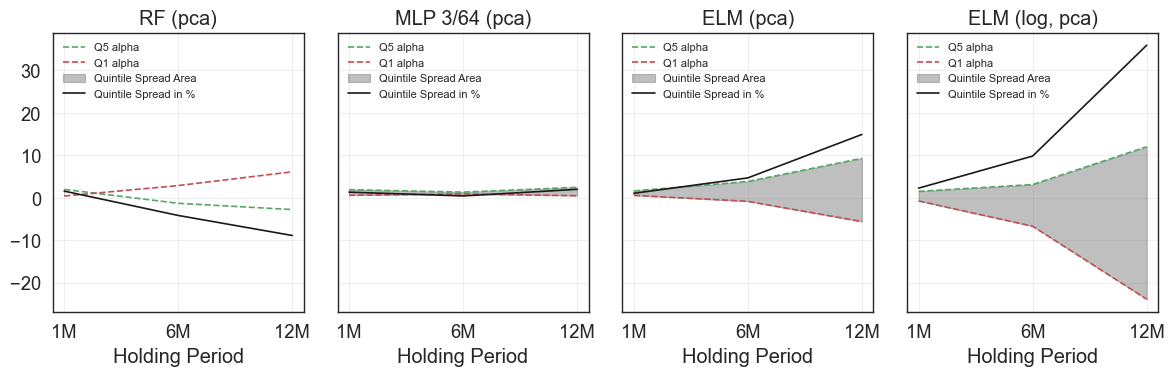

In [22]:
Q1_alpha = alpha_df[['Q1 1M', 'Q1 6M', 'Q1 12M']]
Q5_alpha = alpha_df[['Q5 1M', 'Q5 6M', 'Q5 12M']]

fig, ax = plt.subplots(1, 4, sharey=True, figsize=(12, 4))

x = ['1M', '6M', '12M']

for i in range(len(best_models)):
    ax[i].plot(x, Q5_alpha.iloc[i], 'g--', label='Q5 alpha')
    ax[i].plot(x, Q1_alpha.iloc[i], 'r--', label='Q1 alpha')
    ax[i].fill_between(x, Q5_alpha.iloc[i].values, Q1_alpha.iloc[i].values, label= 'Quintile Spread Area',
                       where=(Q5_alpha.iloc[i].values > Q1_alpha.iloc[i].values), color='grey', alpha=0.5)
    ax[i].plot(x, Q5_alpha.iloc[i].values - Q1_alpha.iloc[i].values, 'k-', label='Quintile Spread in %')

    ax[i].set_xlabel('Holding Period')

    ax[i].set_title(titles[i])

    ax[i].legend(fontsize=8, frameon=False, loc='upper left')

    ax[i].grid(alpha=0.3)
    
plt.tight_layout()

plt.show()

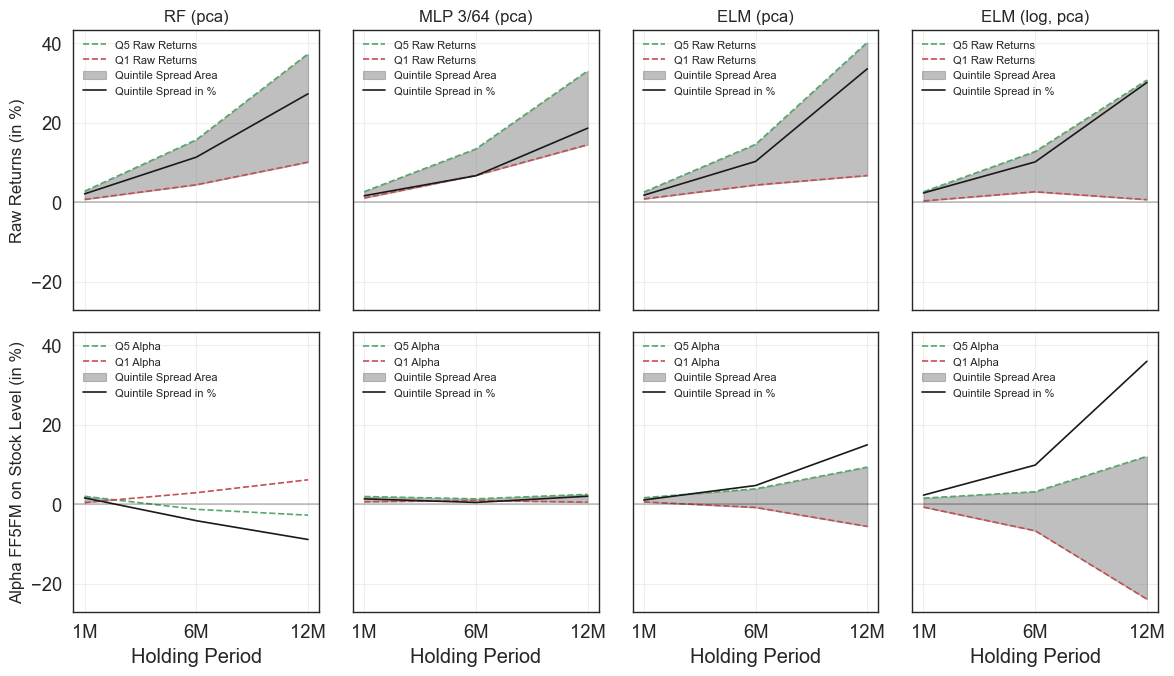

In [23]:

fig, ax = plt.subplots(2, len(best_models), sharey=True, sharex=True, figsize=(12, 7))

ax[0, 0].set_ylabel('Raw Returns (in %)', fontsize=12)
ax[1, 0].set_ylabel('Alpha FF5FM on Stock Level (in %)', fontsize=12)


x = ['1M', '6M', '12M']

for i in range(len(best_models)):
    ax[0, i].plot(x, to_plot[i].iloc[4].T, 'g--', label='Q5 Raw Returns')
    ax[0, i].plot(x, to_plot[i].iloc[0].T, 'r--', label='Q1 Raw Returns')
    ax[0, i].fill_between(x, to_plot[i].iloc[0].T, to_plot[i].iloc[4].T, label= 'Quintile Spread Area',
                          where=(to_plot[i].iloc[4].T > to_plot[i].iloc[0].T.values), interpolate=True, color='grey', alpha=0.5)
    ax[0, i].plot(x, to_plot[i].iloc[4].T - to_plot[i].iloc[0].T, 'k-', label='Quintile Spread in %')
    ax[0, i].set_title(titles[i], fontsize=12)
    
    ax[1, i].plot(x, Q5_alpha.iloc[i], 'g--', label='Q5 Alpha')
    ax[1, i].plot(x, Q1_alpha.iloc[i], 'r--', label='Q1 Alpha')
    ax[1, i].fill_between(x, Q5_alpha.iloc[i].values, Q1_alpha.iloc[i].values, label= 'Quintile Spread Area',
                       where=(Q5_alpha.iloc[i].values > Q1_alpha.iloc[i].values), interpolate=True, color='grey', alpha=0.5)
    ax[1, i].plot(x, Q5_alpha.iloc[i].values - Q1_alpha.iloc[i].values, 'k-', label='Quintile Spread in %')
    
    ax[1, i].set_xlabel('Holding Period')
    
    for j in range(2):
        

        ax[j, i].legend(fontsize=8, frameon=False, loc='upper left')

        ax[j, i].grid(alpha=0.3)
        
        ax[j, i].axhline(0, color='black', lw=0.3)

plt.tight_layout()
plt.savefig("visualisations/Raw returns vs alpha for best models", dpi=300, bbox_inches='tight')
plt.show()

In [24]:
df_list[3]

Quintile  Mispricing  Next 1M Return (%)  Next 1M Excess Return (%)   
0       1.0   -0.999989            0.299627                   0.122700  \
1       2.0   -0.999705            0.502512                   0.454817   
2       3.0   -0.991554            1.473802                   1.441601   
3       4.0   -0.930847            1.618093                   1.522736   
4       5.0   -0.324684            2.595573                   2.469911   

   Next 1M Return over Index (%)  Next 6M Return (%)   
0                       0.213251            2.599101  \
1                       0.121814            0.915707   
2                       0.107759            7.594545   
3                      -0.017900           11.174386   
4                       0.744386           12.716868   

   Next 6M Excess Return (%)  Next 6M Return over Index (%)   
0                   1.669747                       2.709652  \
1                   0.610364                       1.854301   
2                   7.424215                       0.456729   
3                  10.714584                       0.916951   
4                  12.097789                       3.572755   

   Next 12M Return (%)  Next 12M Excess Return (%)   
0             0.611145                   -0.643304  \
1             2.121583                    1.458474   
2            10.463888                   10.041830   
3            21.226704                   20.540710   
4            30.695150                   29.775874   

   Next 12M Return over Index (%)  
0                        8.109458  
1                        6.107131  
2                        0.531246  
3                        1.217378  
4                       10.620381

In [26]:
next_index_df = pd.read_csv('data/next_index_returns.csv', index_col=0, parse_dates=[1])
test_next_index = next_index_df[next_index_df['Date'].dt.year >= 2019].iloc[:-19]
(test_next_index['Next 1M Index Return (%)'].sum()/test_next_index.shape[0])*12

18.717585073327424

Average 12M index return in the relevant subset of the testing period (2019, 2020, 2021)

### Same figure for Baselines

In [27]:
baselines = ["PE Multiples Valuation", "BGLR (no scaling)",
             "LR (no log)", "LR (yes log)"]

titles_baselines = ["PE Multiples", "BGLR", "LR", "LR (log)"]

to_plot, df_list = vis1(baselines)

In [28]:
alpha_df = EstAlpha.est_alphas_summary(baselines, 'FF5FM', 'stock', save_as=None)
Q1_alpha = alpha_df[['Q1 1M', 'Q1 6M', 'Q1 12M']]
Q5_alpha = alpha_df[['Q5 1M', 'Q5 6M', 'Q5 12M']]

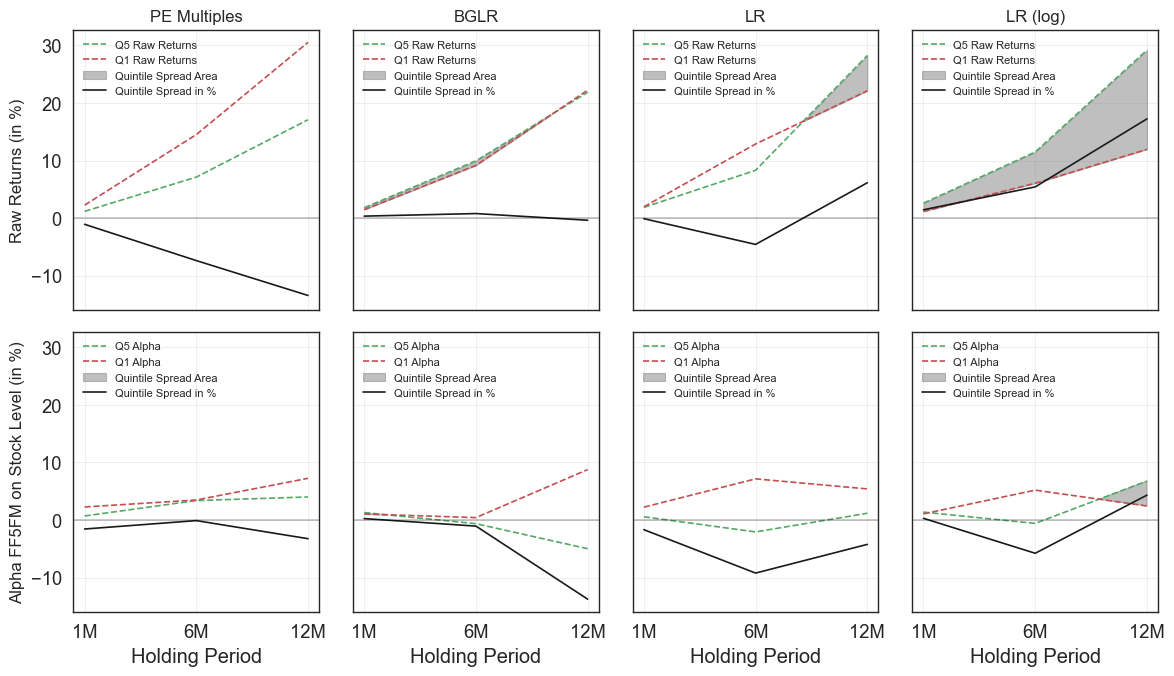

In [29]:
fig, ax = plt.subplots(2, len(baselines), sharey=True, sharex=True, figsize=(12, 7))

ax[0, 0].set_ylabel('Raw Returns (in %)', fontsize=12)
ax[1, 0].set_ylabel('Alpha FF5FM on Stock Level (in %)', fontsize=12)


x = ['1M', '6M', '12M']

for i in range(len(baselines)):
    ax[0, i].plot(x, to_plot[i].iloc[4].T, 'g--', label='Q5 Raw Returns')
    ax[0, i].plot(x, to_plot[i].iloc[0].T, 'r--', label='Q1 Raw Returns')
    ax[0, i].fill_between(x, to_plot[i].iloc[0].T, to_plot[i].iloc[4].T, label= 'Quintile Spread Area',
                          where=(to_plot[i].iloc[4].T > to_plot[i].iloc[0].T.values), interpolate=True, color='grey', alpha=0.5)
    ax[0, i].plot(x, to_plot[i].iloc[4].T - to_plot[i].iloc[0].T, 'k-', label='Quintile Spread in %')
    ax[0, i].set_title(titles_baselines[i], fontsize=12)
    
    ax[1, i].plot(x, Q5_alpha.iloc[i], 'g--', label='Q5 Alpha')
    ax[1, i].plot(x, Q1_alpha.iloc[i], 'r--', label='Q1 Alpha')
    ax[1, i].fill_between(x, Q5_alpha.iloc[i].values, Q1_alpha.iloc[i].values, label= 'Quintile Spread Area',
                       where=(Q5_alpha.iloc[i].values > Q1_alpha.iloc[i].values), interpolate=True, color='grey', alpha=0.5)
    ax[1, i].plot(x, Q5_alpha.iloc[i].values - Q1_alpha.iloc[i].values, 'k-', label='Quintile Spread in %')
    
    ax[1, i].set_xlabel('Holding Period')
    
    for j in range(2):
        

        ax[j, i].legend(fontsize=8, frameon=False, loc='upper left')

        ax[j, i].grid(alpha=0.3)
        
        ax[j, i].axhline(0, color='black', lw=0.3)

plt.tight_layout()
plt.savefig("visualisations/Raw returns vs alpha for baselines", dpi=300, bbox_inches='tight')
plt.show()

## Actual vs. Predicted Values Visualisation

In [30]:
ev1_baseline_dfs = ev.get_ev1_df_list(baselines)
ev1_bestML_dfs = ev.get_ev1_df_list(best_models)

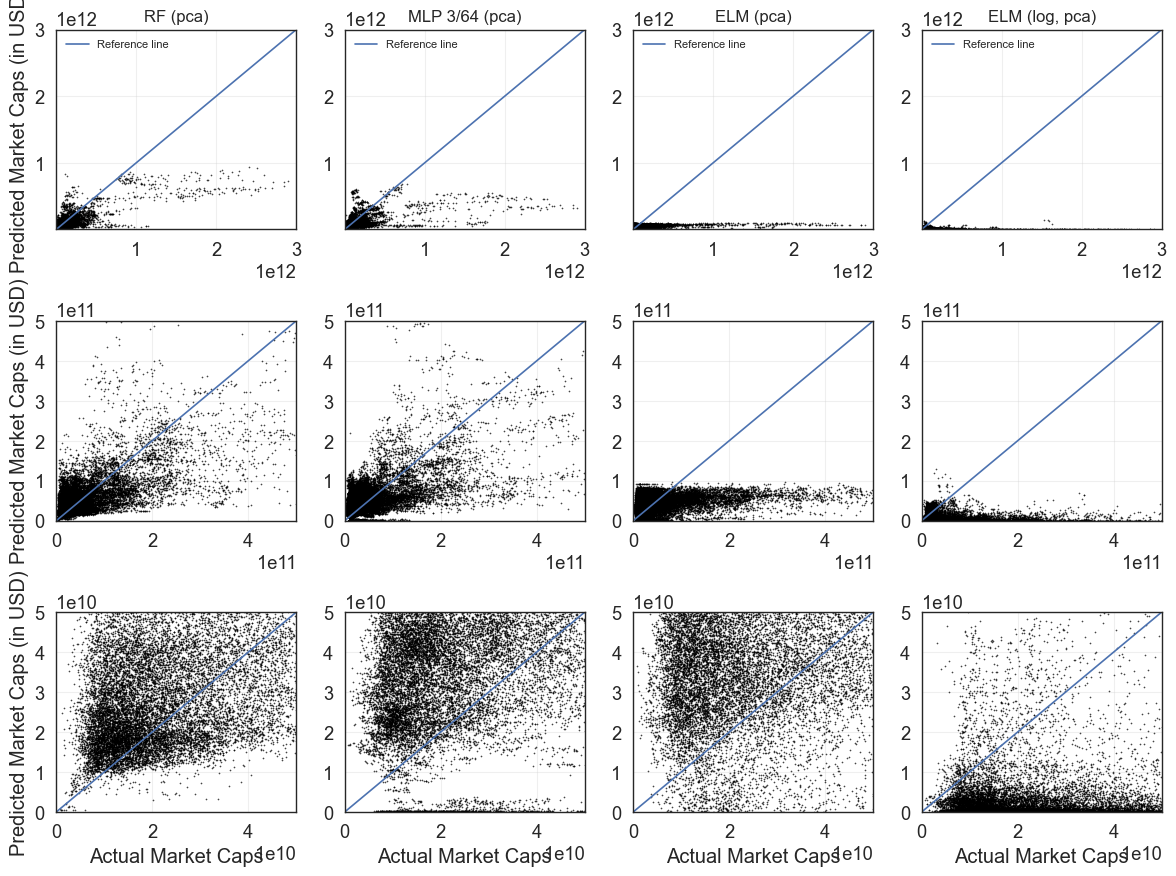

In [34]:
x_line = np.linspace(0, 3000000000000, 2)
y_line = x_line

fig, ax = plt.subplots(3, 4, sharey=False, figsize=(12, 9))

ax[0, 0].set_ylabel('Predicted Market Caps (in USD)')
ax[1, 0].set_ylabel('Predicted Market Caps (in USD)')
ax[2, 0].set_ylabel('Predicted Market Caps (in USD)')


for i in range(4):
    for j in range(3):
        ax[j, i].scatter(ev1_bestML_dfs[i]['Company Market Cap'], ev1_bestML_dfs[i]['pred'], color='black', s=0.1, alpha=1)
        ax[j, i].plot(x_line, y_line, 'b-', label='Reference line')
        ax[j, i].grid(alpha=0.3)
    
    
    
    ax[0, i].legend(frameon=False, fontsize=8)
    ax[0, i].set_title(titles[i], fontsize=12)
    ax[0, i].set_yticks([1000000000000, 2000000000000, 3000000000000])
    ax[0, i].set_xticks([1000000000000, 2000000000000, 3000000000000])
    ax[2, i].set_xlabel('Actual Market Caps')
    
    ax[0, i].set_xlim(0, 3000000000000)
    ax[0, i].set_ylim(0, 3000000000000)
    
    ax[1, i].set_xlim(0, 500000000000)
    ax[1, i].set_ylim(0, 500000000000)
    
    ax[2, i].set_xlim(0, 50000000000)
    ax[2, i].set_ylim(0, 50000000000)
    
    

    
    
           
# plt.suptitle(f'Actual vs. Predicted Company Market Capitalisations')
plt.tight_layout()

# plt.savefig("visualisations/Actual vs Predicted Market Capitalisations of best ML models", dpi=300, bbox_inches='tight')

plt.show()


In [32]:
sum(ev1_bestML_dfs[3]['pred'] < ev1_bestML_dfs[i]['Company Market Cap']) / len(ev1_bestML_dfs[i]['Company Market Cap'])

0.9607909989771565

In [33]:
print(f"Companies classified as overvalued:\n")

for i in range(4):
    p = sum(ev1_bestML_dfs[i]['pred'] < ev1_bestML_dfs[i]['Company Market Cap']) / len(ev1_bestML_dfs[i]['Company Market Cap'])
    print(f"{titles[i]}: {p*100:.2f}%")

Companies classified as overvalued:

RF (pca): 40.03%
MLP 3/64 (pca): 32.45%
ELM (pca): 38.56%
ELM (log, pca): 96.08%
